# India Air Quality Dataset 

### Importing Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_predict

import warnings
warnings.filterwarnings('ignore')

## Importing Data's

In [2]:
df1=pd.read_csv("C:\\Users\\DELL\\Desktop\\POLLUTION Dataset\\pollution Dataset\\station_hour.csv")
df2=pd.read_csv("C:\\Users\\DELL\\Desktop\\POLLUTION Dataset\\pollution Dataset\\station_day.csv")

In [3]:
station=pd.read_csv("C:\\Users\\DELL\\Desktop\\POLLUTION Dataset\\pollution Dataset\\stations.csv")

In [4]:
df1=pd.merge(df1,station,on="StationId")
df2=pd.merge(df2,station,on="StationId")

## Understanding Data

In [5]:
df1.shape

(1048488, 20)

In [6]:
df1.head()

StationId          Datetime  PM2.5   PM10    NO    NO2    NOx    NH3    CO  \
0     AP001  30-06-2020 23:00  24.25  40.75  1.23  10.82   6.78   8.75  0.61   
1     AP001  30-06-2020 22:00  30.25  49.00  1.33  17.10  10.20   9.82  0.71   
2     AP001  30-06-2020 21:00  24.50  46.50  2.02  18.85  11.70  10.25  0.74   
3     AP001  30-06-2020 20:00  28.75  39.00  1.50  14.05   8.68   9.40  0.76   
4     AP001  30-06-2020 19:00  27.25  35.50  1.83  12.40   8.05   9.10  0.66   

     SO2     O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  \
0  11.12  31.77     0.12     1.10    0.30  55.0  Satisfactory   
1  11.78  29.32     0.30     3.85    0.32  78.0  Satisfactory   
2  12.85  34.98     0.38     2.55    0.28  78.0  Satisfactory   
3  11.95  39.98     0.32     1.40    0.15  78.0  Satisfactory   
4  12.75  50.35     0.17     0.90    0.10  78.0  Satisfactory   

                      StationName       City           State  Status  
0  Secretariat, Amaravati - APPCB  Amaravati  Andhra Pradesh  Active  
1  Secretariat, Amaravati - APPCB  Amaravati  Andhra Pradesh  Active  
2  Secretariat, Amaravati - APPCB  Amaravati  Andhra Pradesh  Active  
3  Secretariat, Amaravati - APPCB  Amaravati  Andhra Pradesh  Active  
4  Secretariat, Amaravati - APPCB  Amaravati  Andhra Pradesh  Active

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048488 entries, 0 to 1048487
Data columns (total 20 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   StationId    1048488 non-null  object 
 1   Datetime     1048488 non-null  object 
 2   PM2.5        800121 non-null   float64
 3   PM10         705781 non-null   float64
 4   NO           817879 non-null   float64
 5   NO2          831375 non-null   float64
 6   NOx          855833 non-null   float64
 7   NH3          581748 non-null   float64
 8   CO           827438 non-null   float64
 9   SO2          664292 non-null   float64
 10  O3           798012 non-null   float64
 11  Benzene      701794 non-null   float64
 12  Toluene      672121 non-null   float64
 13  Xylene       213410 non-null   float64
 14  AQI          808992 non-null   float64
 15  AQI_Bucket   808992 non-null   object 
 16  StationName  1048488 non-null  object 
 17  City         1048488 non-null  object 
 18  St

In [8]:
df1["StationId"].nunique()

42

In [9]:
df1["City"].nunique()

6

In [10]:
df2.shape

(107927, 20)

In [11]:
df2.head()

StationId        Date  PM2.5    PM10    NO    NO2    NOx    NH3    CO  \
0     AP001  24-11-2017  71.36  115.75  1.75  20.65  12.40  12.19  0.10   
1     AP001  25-11-2017  81.40  124.50  1.44  20.50  12.08  10.72  0.12   
2     AP001  26-11-2017  78.32  129.06  1.26  26.00  14.85  10.28  0.14   
3     AP001  27-11-2017  88.76  135.32  6.60  30.85  21.77  12.91  0.11   
4     AP001  28-11-2017  64.18  104.09  2.56  28.07  17.01  11.42  0.09   

     SO2      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  \
0  10.76  109.26     0.17     5.92    0.10    NaN        NaN   
1  15.24  127.09     0.20     6.50    0.06  184.0   Moderate   
2  26.96  117.44     0.22     7.95    0.08  197.0   Moderate   
3  33.59  111.81     0.29     7.63    0.12  198.0   Moderate   
4  19.00  138.18     0.17     5.02    0.07  188.0   Moderate   

                      StationName       City           State  Status  
0  Secretariat, Amaravati - APPCB  Amaravati  Andhra Pradesh  Active  
1  Secretariat, Amaravati - APPCB  Amaravati  Andhra Pradesh  Active  
2  Secretariat, Amaravati - APPCB  Amaravati  Andhra Pradesh  Active  
3  Secretariat, Amaravati - APPCB  Amaravati  Andhra Pradesh  Active  
4  Secretariat, Amaravati - APPCB  Amaravati  Andhra Pradesh  Active

In [12]:
df2["StationId"].nunique()

110

In [13]:
df2["City"].nunique()

26

In [14]:
df2.columns

Index(['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'StationName', 'City', 'State', 'Status'],
      dtype='object')

####  OBSERVSTIONS
    We have three datasets having hourly and daily basis.
    Total datas are of 26 Indian Districts observed from 110 stations
    Values of PM 10, PM 2.5, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene, AQI Are observed
    Values Toluene, Benzene and Xylene are dropped because of null values are high and having comparitively less impact variables on AQI.

## Data Cleaning

Text(0.5, 1.0, 'Percentage of null values')

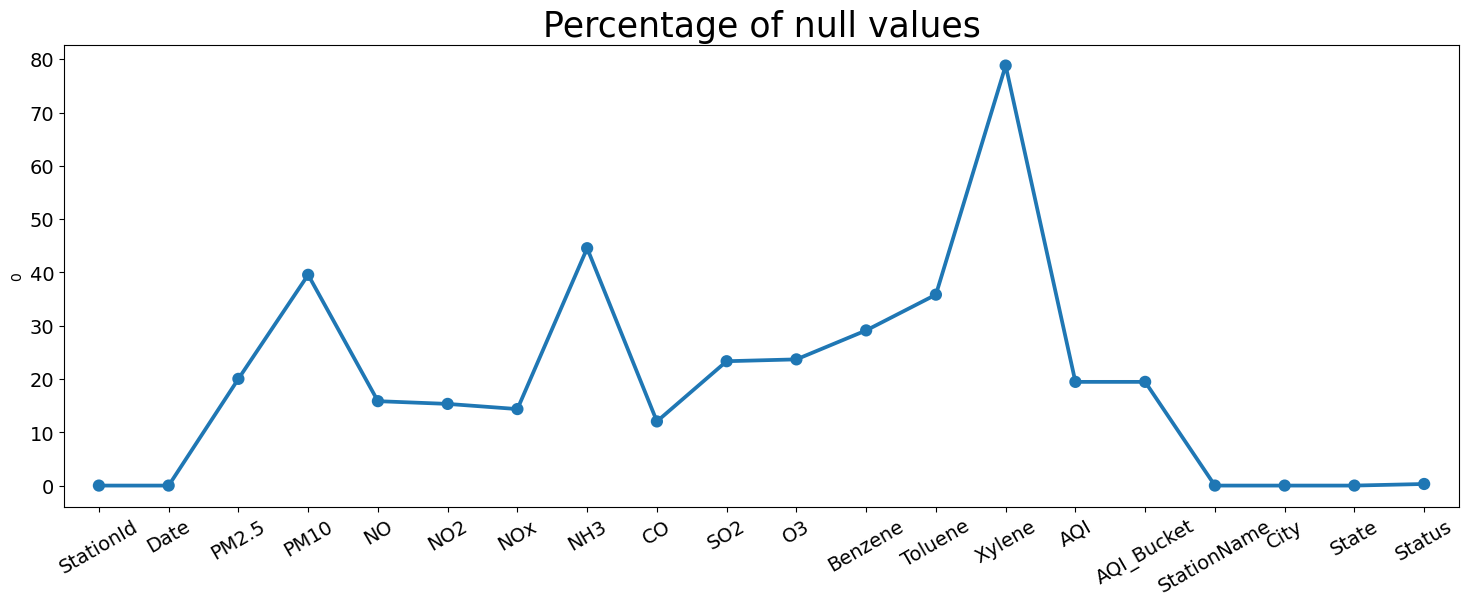

In [15]:
null=pd.DataFrame(df2.isnull().sum())

plt.figure(figsize=(18,6))
sns.pointplot(x=null.index,y=(null[0]/(df2.shape[0]))*100)
plt.xticks(rotation=30)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title(label="Percentage of null values",fontsize=25)

In [16]:
df2=df2.drop(["Toluene", "Benzene", "Xylene"],axis=1)

In [17]:
df2.isnull().sum()

StationId          0
Date               0
PM2.5          21611
PM10           42680
NO             17094
NO2            16539
NOx            15492
NH3            48070
CO             12990
SO2            25183
O3             25556
AQI            21001
AQI_Bucket     21001
StationName        0
City               0
State              0
Status           322
dtype: int64

In [18]:
#Station Defects
df_n=df2.select_dtypes(exclude="object")
df_n["StationId"]=df2["StationId"]
col=list(df_n.columns)
col.pop()
station_defect=[]
for i in col:
    station_defect.append(df2.groupby(["StationId"])[i].mean().isnull().sum())
print(pd.DataFrame(station_defect,index=col))

        0
PM2.5   3
PM10   18
NO      1
NO2     0
NOx     3
NH3    27
CO      1
SO2     9
O3      7
AQI     1


In [19]:
#City Defects
df_n=df2.select_dtypes(exclude="object")
df_n["City"]=df2["City"]
col=list(df_n.columns)
col.pop()
station_defect=[]
for i in col:
    station_defect.append(df2.groupby(["City"])[i].mean().isnull().sum())
print(pd.DataFrame(station_defect,index=col))

       0
PM2.5  0
PM10   1
NO     0
NO2    0
NOx    1
NH3    1
CO     0
SO2    0
O3     1
AQI    0


In [20]:
station_wise_grouped=df2.groupby("StationId")
df_fill1=station_wise_grouped.transform(lambda x :x.fillna(x.mean()))

In [21]:
df_fill1.isnull().sum()

PM2.5     4945
PM10     30155
NO         737
NO2          0
NOx       3457
NH3      39579
CO        1552
SO2       9120
O3       10587
AQI       1552
dtype: int64

In [22]:
df_fill1.shape

(107927, 10)

In [23]:
df_fill1.head()

PM2.5    PM10    NO    NO2    NOx    NH3    CO    SO2      O3        AQI
0  71.36  115.75  1.75  20.65  12.40  12.19  0.10  10.76  109.26   95.34881
1  81.40  124.50  1.44  20.50  12.08  10.72  0.12  15.24  127.09  184.00000
2  78.32  129.06  1.26  26.00  14.85  10.28  0.14  26.96  117.44  197.00000
3  88.76  135.32  6.60  30.85  21.77  12.91  0.11  33.59  111.81  198.00000
4  64.18  104.09  2.56  28.07  17.01  11.42  0.09  19.00  138.18  188.00000

In [24]:
df_fill1["StationId"]=df2["StationId"]
df_fill1["City"]=df2["City"]
df_fill1["Date"]=df2["Date"]
df_fill1["State"]=df2["State"]
df_fill1["AQI_Bucket"]=df2["AQI_Bucket"]
df_fill1["AQI"]=df2["AQI"]

In [25]:
city_wise_grouped=df_fill1.groupby("City")
df_fill2=city_wise_grouped.transform(lambda x:x.fillna(x.mean()))

In [26]:
null=pd.DataFrame(df_fill2.isnull().sum())

In [27]:
df_fill2["StationId"]=df2["StationId"]
df_fill2["City"]=df2["City"]
df_fill2["Date"]=df2["Date"]
df_fill2["State"]=df2["State"]
df_fill2["AQI_Bucket"]=df2["AQI_Bucket"]
df_fill2["AQI"]=df2["AQI"]

In [28]:
df_fill2.head()

PM2.5    PM10    NO    NO2    NOx    NH3    CO    SO2      O3    AQI  \
0  71.36  115.75  1.75  20.65  12.40  12.19  0.10  10.76  109.26    NaN   
1  81.40  124.50  1.44  20.50  12.08  10.72  0.12  15.24  127.09  184.0   
2  78.32  129.06  1.26  26.00  14.85  10.28  0.14  26.96  117.44  197.0   
3  88.76  135.32  6.60  30.85  21.77  12.91  0.11  33.59  111.81  198.0   
4  64.18  104.09  2.56  28.07  17.01  11.42  0.09  19.00  138.18  188.0   

  StationId       City        Date           State AQI_Bucket  
0     AP001  Amaravati  24-11-2017  Andhra Pradesh        NaN  
1     AP001  Amaravati  25-11-2017  Andhra Pradesh   Moderate  
2     AP001  Amaravati  26-11-2017  Andhra Pradesh   Moderate  
3     AP001  Amaravati  27-11-2017  Andhra Pradesh   Moderate  
4     AP001  Amaravati  28-11-2017  Andhra Pradesh   Moderate

Text(0.5, 1.0, 'Percentage of null values')

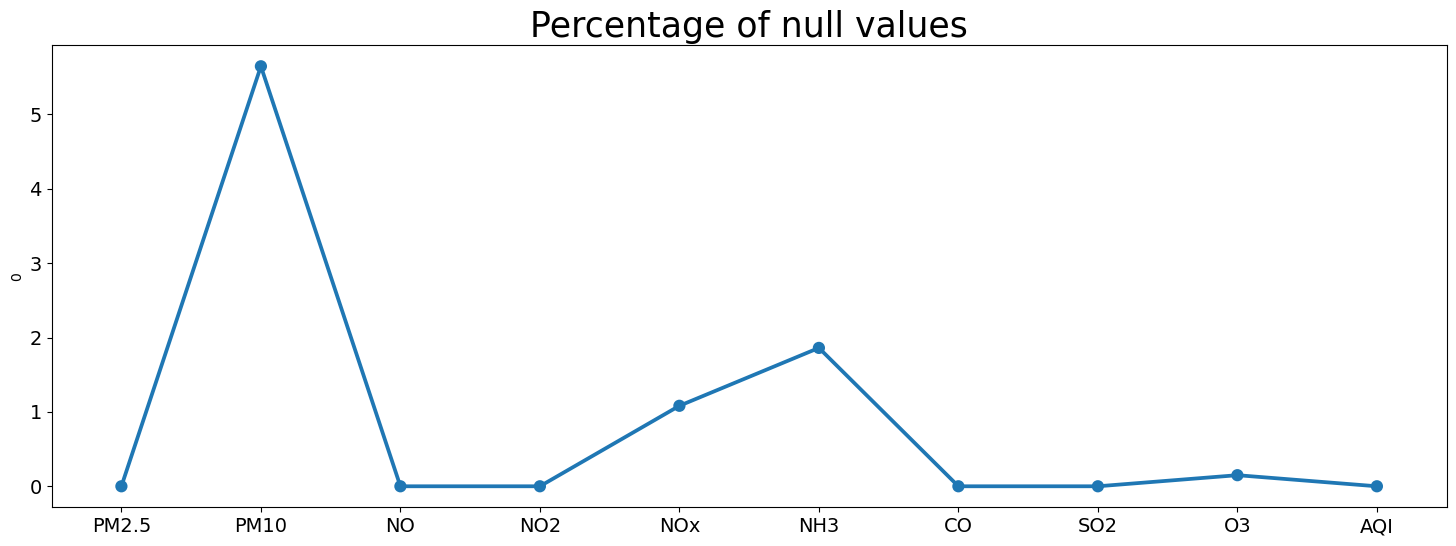

In [29]:
plt.figure(figsize=(18,6))
sns.pointplot(x=null.index,y=(null[0]/(df_fill2.shape[0]))*100)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title(label="Percentage of null values",fontsize=25)

In [30]:
df_filled=df_fill2.select_dtypes(include="float64")

###  Filling Null values using KNN imputer

In [31]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)

imputed_data = knn_imputer.fit_transform(df_filled)

In [32]:
df_imputed = pd.DataFrame(imputed_data, columns=df_filled.columns)

In [33]:
df_imputed.isnull().sum()

PM2.5    0
PM10     0
NO       0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [34]:
df_imputed["StationId"]=df2["StationId"]
df_imputed["City"]=df2["City"]
df_imputed["Date"]=df2["Date"]
df_imputed["State"]=df2["State"]
df_imputed["AQI_Bucket"]=df2["AQI_Bucket"]

Text(0.5, 1.0, 'Percentage of null values')

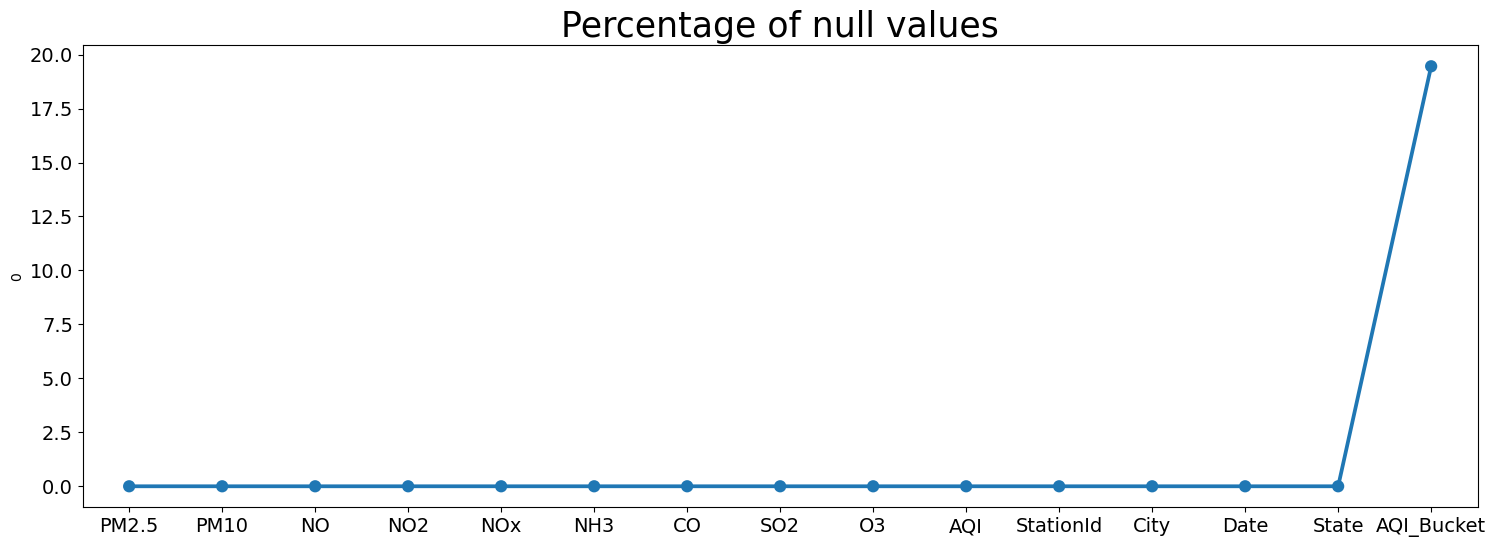

In [35]:
null=pd.DataFrame(df_imputed.isnull().sum())

plt.figure(figsize=(18,6))
sns.pointplot(x=null.index,y=(null[0]/(df2.shape[0]))*100)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title(label="Percentage of null values",fontsize=25)

In [36]:
for j,i in enumerate(df_imputed["AQI"]):
    if (i<=50):
        df_imputed["AQI_Bucket"][j]="Good"
    elif(i<=100):
        df_imputed["AQI_Bucket"][j]="Satisfactory"
    elif(i<=200):
        df_imputed["AQI_Bucket"][j]="Moderate"
    elif(i<=300):
        df_imputed["AQI_Bucket"][j]="Poor"
    elif(i<=400):
        df_imputed["AQI_Bucket"][j]="Very Poor"
    elif(i>=400):
        df_imputed["AQI_Bucket"][j]="Severe"

In [37]:
df_imputed.isnull().sum()

PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
AQI           0
StationId     0
City          0
Date          0
State         0
AQI_Bucket    0
dtype: int64

In [38]:
df_imputed.insert(0, 'StationId', df_imputed.pop('StationId'))
df_imputed.insert(1, 'Date', df_imputed.pop('Date'))

Text(0.5, 1.0, 'Percentage of null values')

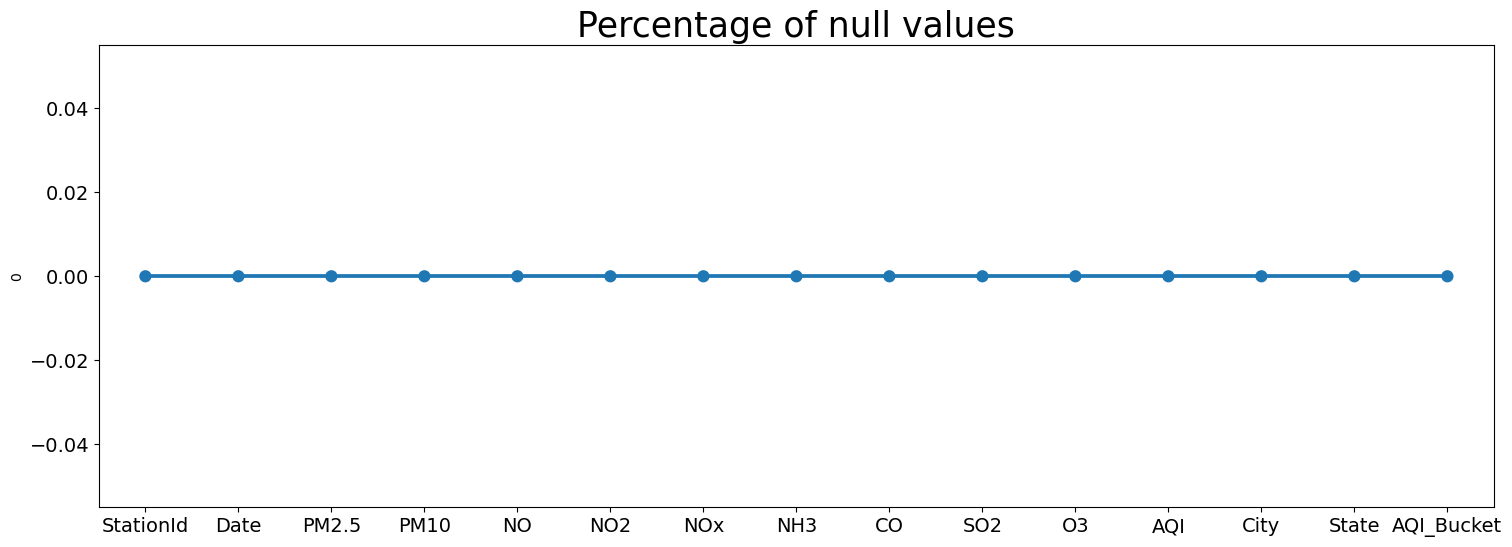

In [39]:
null=pd.DataFrame(df_imputed.isnull().sum())

plt.figure(figsize=(18,6))
sns.pointplot(x=null.index,y=(null[0]/(df_filled.shape[0]))*100)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title(label="Percentage of null values",fontsize=25)

In [40]:
cat_col=df_imputed.select_dtypes(exclude="float64")

## Outliers

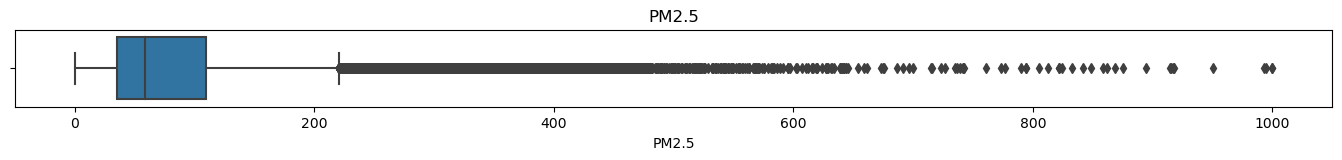

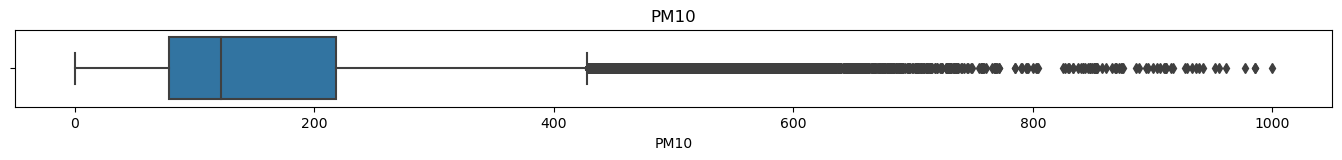

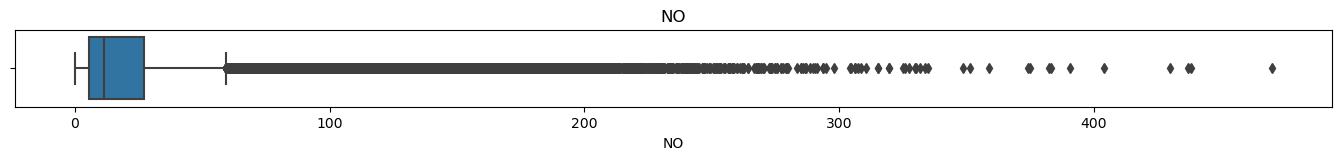

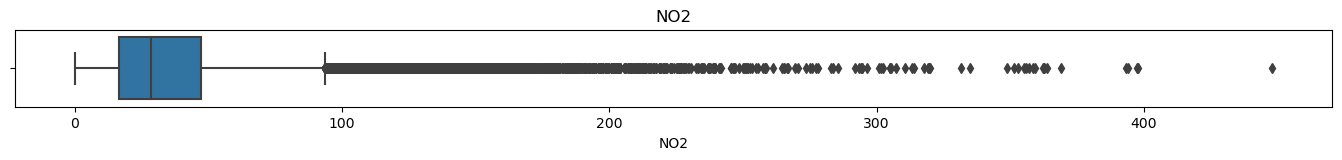

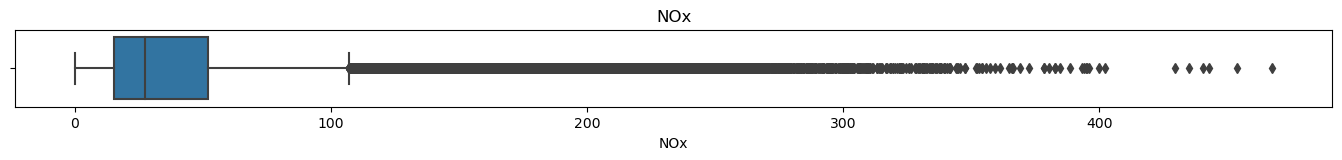

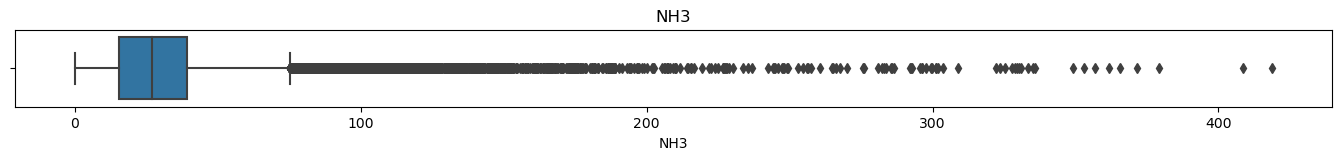

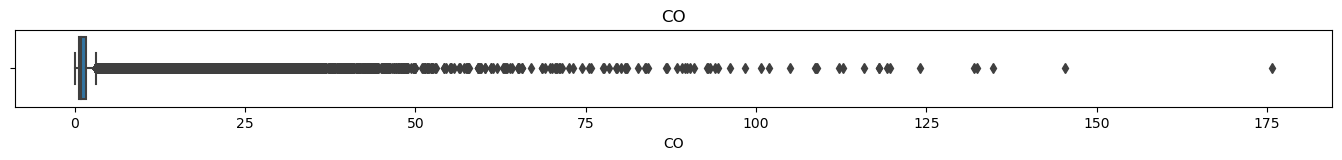

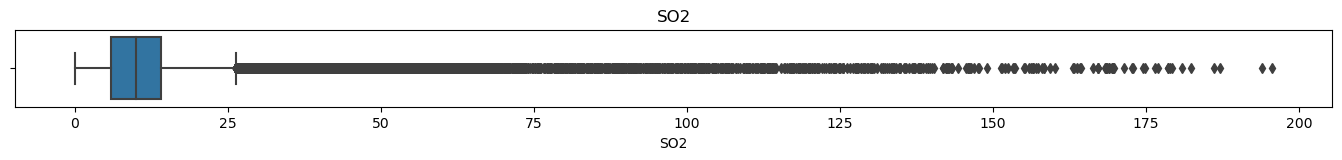

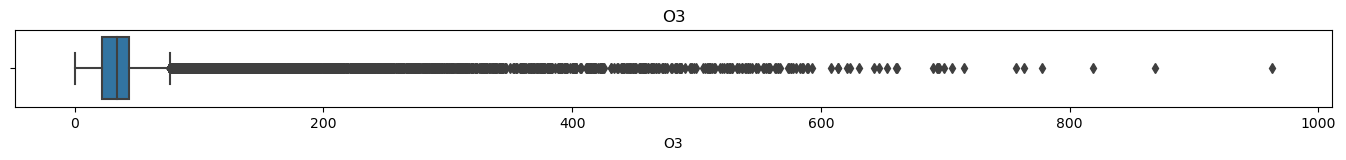

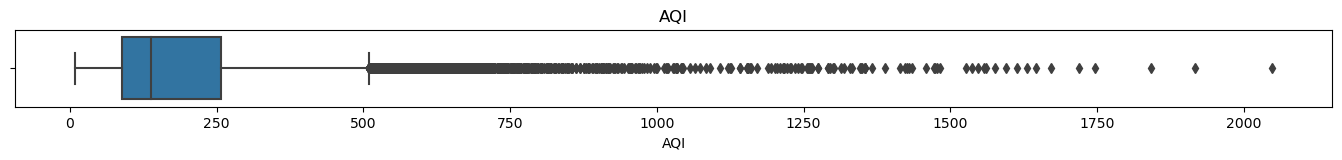

In [41]:
num_col=pd.DataFrame(df_imputed.select_dtypes(include="float64")).columns

for i in num_col:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=df_imputed,x=i)
    plt.title(i)
plt.show()

In [42]:
def outlier_percent(data):
    n=len(list(data))
    outlier=0
    
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    
    iqr=q3-q1
    
    lower_range=q1-(iqr*1.5)
    upper_range=q3+(iqr*1.5)
    
    for i,j in enumerate(data):
        if(j<=lower_range or j>=upper_range):
            outlier=outlier+1
    percent=(outlier/n)*100
    return percent
    

In [43]:
# Function for outlier removal

def outlier_removed(data):
    data_mean=data.mean()
    data=data.to_list()
    
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    
    iqr=q3-q1
    
    lower_range=q1-(iqr*1.5)
    upper_range=q3+(iqr*1.5)
    
    for i,j in enumerate(data):
        if j<=lower_range or j>=upper_range:
            data[i]=data_mean
    
    return data

In [44]:
# Removing outliers
df_cleaned=pd.DataFrame()
for j in range(0,4):
    for i in num_col:
        df_cleaned[i]=outlier_removed(df_imputed[i])

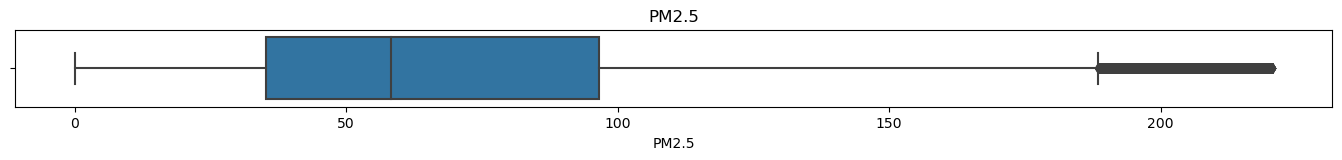

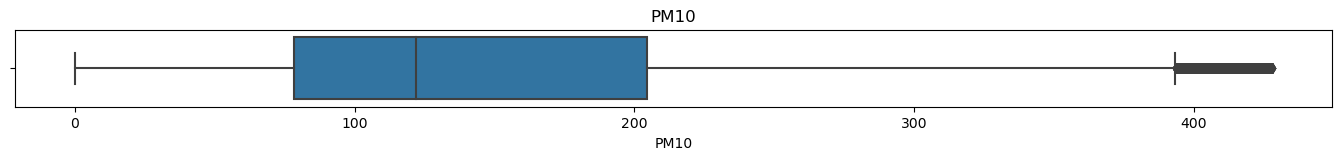

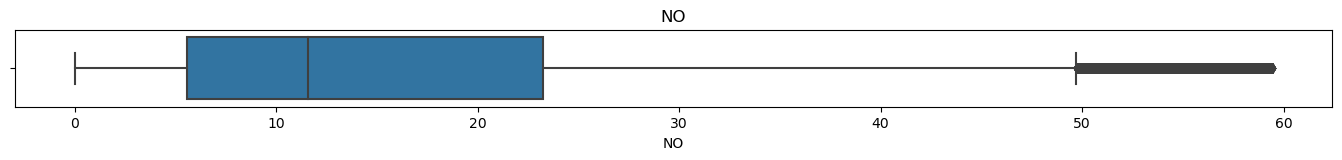

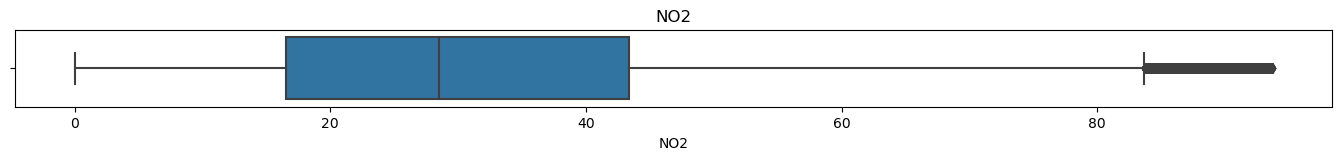

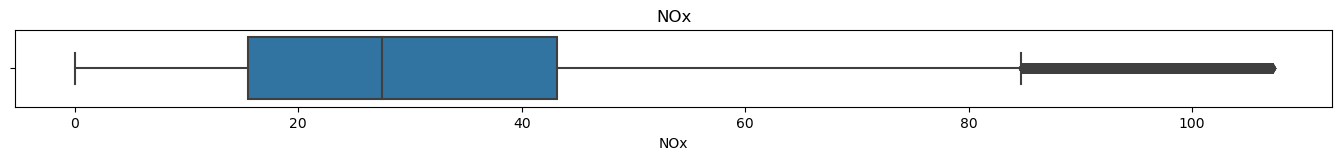

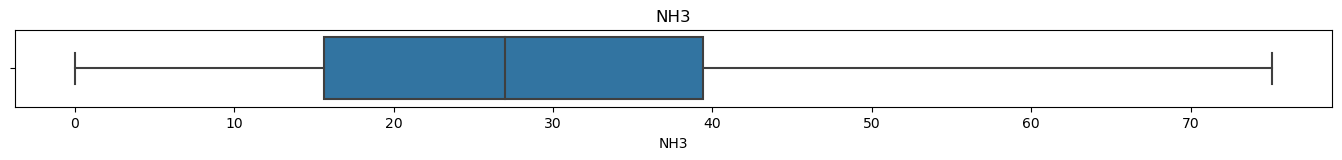

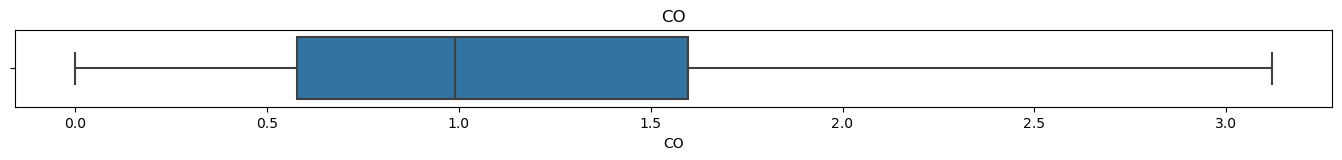

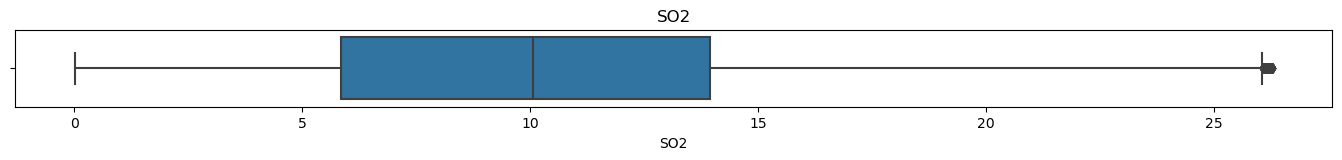

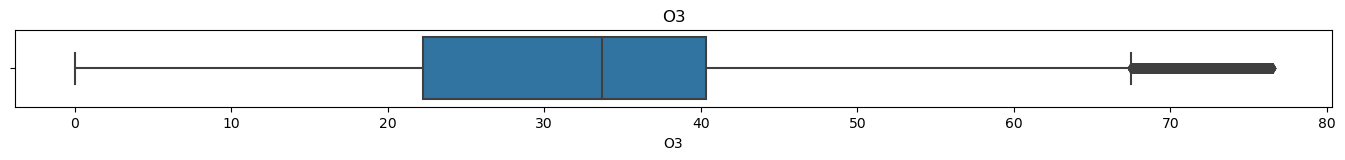

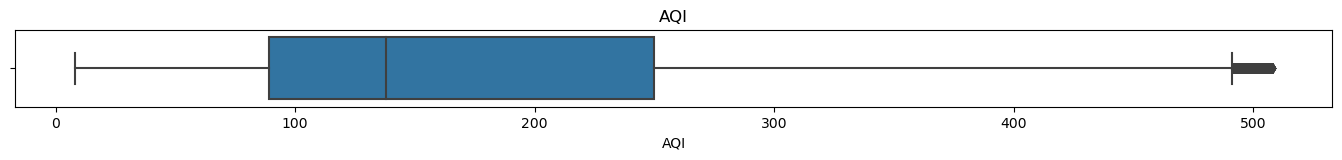

In [45]:
for i in num_col:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=df_cleaned,x=i)
    plt.title(i)
plt.show()

In [46]:
cat_col=df_imputed.select_dtypes(exclude="float64")

for i in cat_col:
    df_cleaned[i]=df_imputed[i]

In [47]:
df_cleaned.head()

PM2.5    PM10    NO    NO2    NOx    NH3    CO        SO2         O3  \
0  71.36  115.75  1.75  20.65  12.40  12.19  0.10  10.760000  38.086407   
1  81.40  124.50  1.44  20.50  12.08  10.72  0.12  15.240000  38.086407   
2  78.32  129.06  1.26  26.00  14.85  10.28  0.14  12.566074  38.086407   
3  88.76  135.32  6.60  30.85  21.77  12.91  0.11  12.566074  38.086407   
4  64.18  104.09  2.56  28.07  17.01  11.42  0.09  19.000000  38.086407   

     AQI StationId        Date       City           State AQI_Bucket  
0  155.2     AP001  24-11-2017  Amaravati  Andhra Pradesh   Moderate  
1  184.0     AP001  25-11-2017  Amaravati  Andhra Pradesh   Moderate  
2  197.0     AP001  26-11-2017  Amaravati  Andhra Pradesh   Moderate  
3  198.0     AP001  27-11-2017  Amaravati  Andhra Pradesh   Moderate  
4  188.0     AP001  28-11-2017  Amaravati  Andhra Pradesh   Moderate

In [48]:
df_cleaned.insert(1,"City",df_cleaned.pop("City"))
df_cleaned.insert(0,"Date",df_cleaned.pop("Date"))

In [49]:
df_cleaned["Date"]=pd.to_datetime(df_cleaned["Date"])

In [50]:
df_cleaned.index=df_cleaned["Date"]

In [51]:
eda_df=df_cleaned

## Exploratory Data Analysis

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
eda_df["AQI_Bucket"].value_counts()

Moderate        33981
Satisfactory    28941
Poor            20222
Very Poor       13289
Good             5843
Severe           5651
Name: AQI_Bucket, dtype: int64

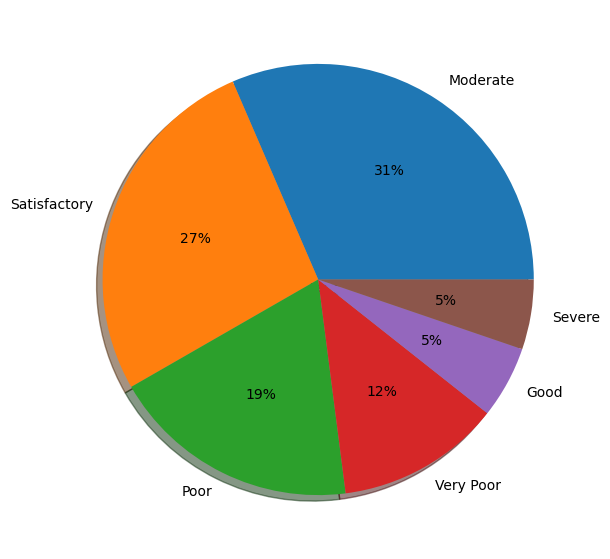

In [54]:
plt.figure(figsize=(7,7))
plt.pie(eda_df["AQI_Bucket"].value_counts(),labels=(eda_df["AQI_Bucket"].value_counts().index),autopct='%.0f%%',shadow=True)
plt.show()

<Axes: xlabel='AQI', ylabel='Percent'>

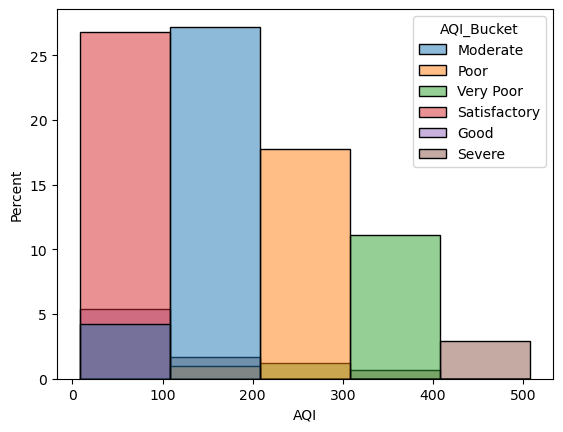

In [55]:
sns.histplot(data=eda_df,x=eda_df["AQI"],stat="percent",bins=5,hue="AQI_Bucket")

In [56]:
eda_df["Below_moderate"]=eda_df["AQI"]
len(eda_df["AQI"])

107927

In [57]:
for i in range(0,107927):
    if (eda_df["AQI"][i]>=200):
        eda_df["Below_moderate"][i]="Below Moderate"
    else:
        eda_df["Below_moderate"][i]="Good"

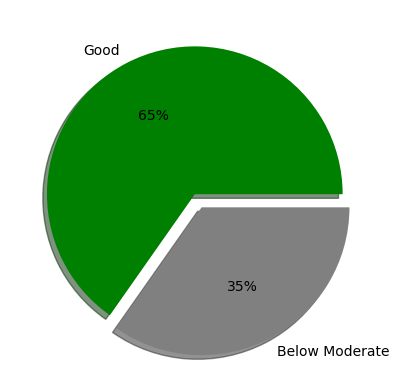

In [58]:
plt.pie(eda_df["Below_moderate"].value_counts(),labels=(eda_df["Below_moderate"].value_counts().index),autopct="%.0f%%",explode=(0, 0.1),shadow=True,colors=["g","grey"])
plt.show()

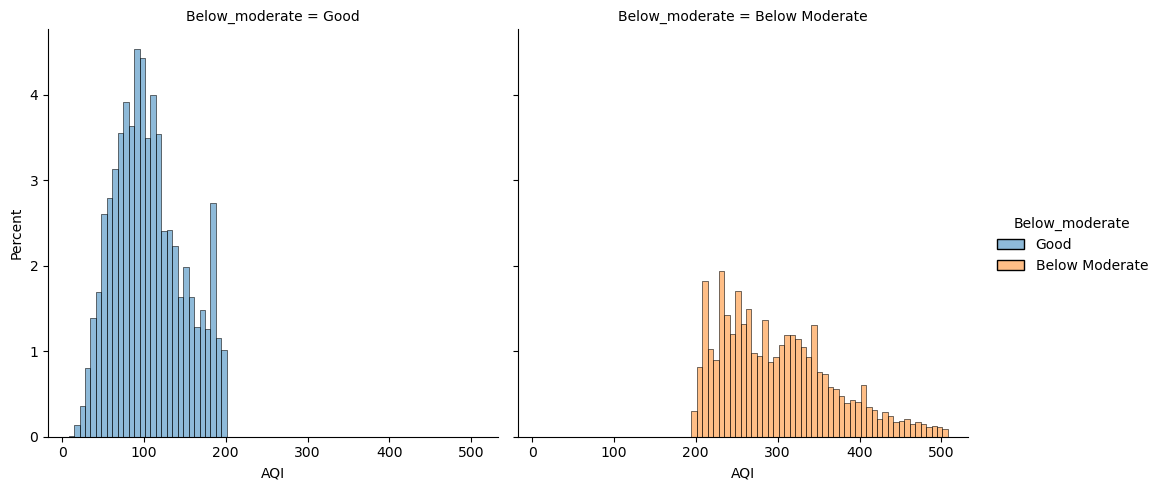

In [59]:
sns.displot(data=eda_df, x=eda_df["AQI"], stat="percent", hue="Below_moderate", col="Below_moderate")

<Axes: title={'center': 'percentage of days in below satisfactory level'}, xlabel='City'>

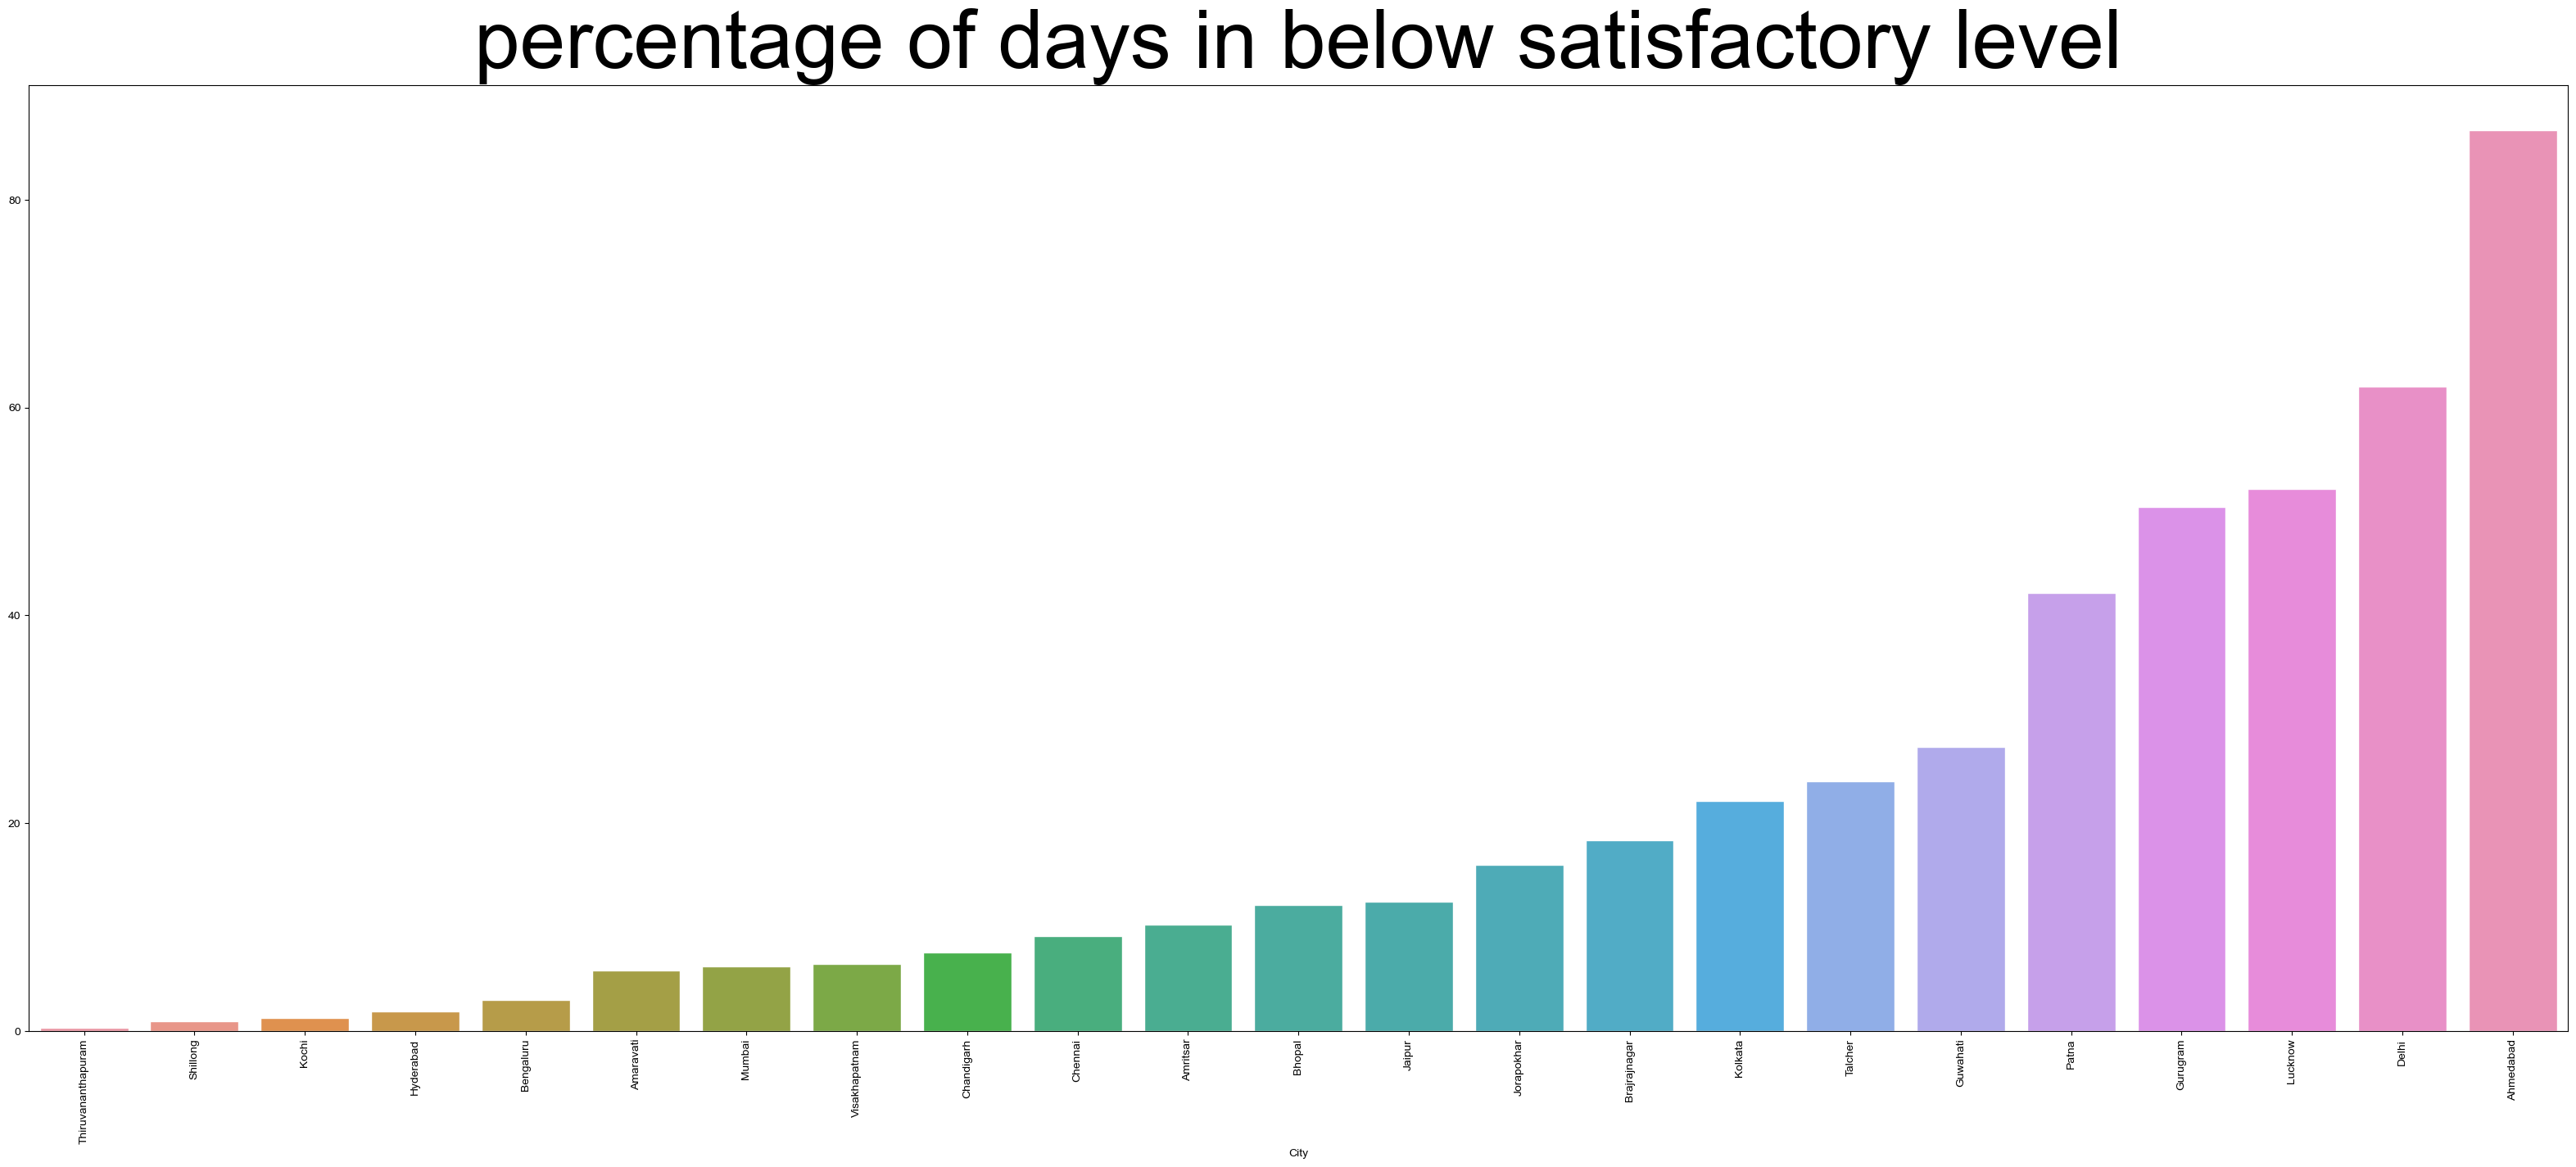

In [60]:
eda_df['AQI_Rank']=eda_df['AQI_Bucket'].map({'Poor':2, 'Very Poor':1, 'Severe':0, 'Moderate':3, 'Satisfactory':4,
       'Good':5})

y=(eda_df[eda_df['AQI_Rank']<=2].groupby(['City'])['AQI_Rank'].count()/eda_df.groupby(['City'])['AQI_Bucket'].count())*100
y.dropna(inplace=True)
fig, ax = plt.subplots(figsize=(40, 15))
sns.set(font_scale=6)
plt.xticks(rotation=90)
plt.title("percentage of days in below satisfactory level")
sns.barplot(x=y.sort_values().index,y=y.sort_values().values)


<Axes: xlabel='AQI', ylabel='O3'>

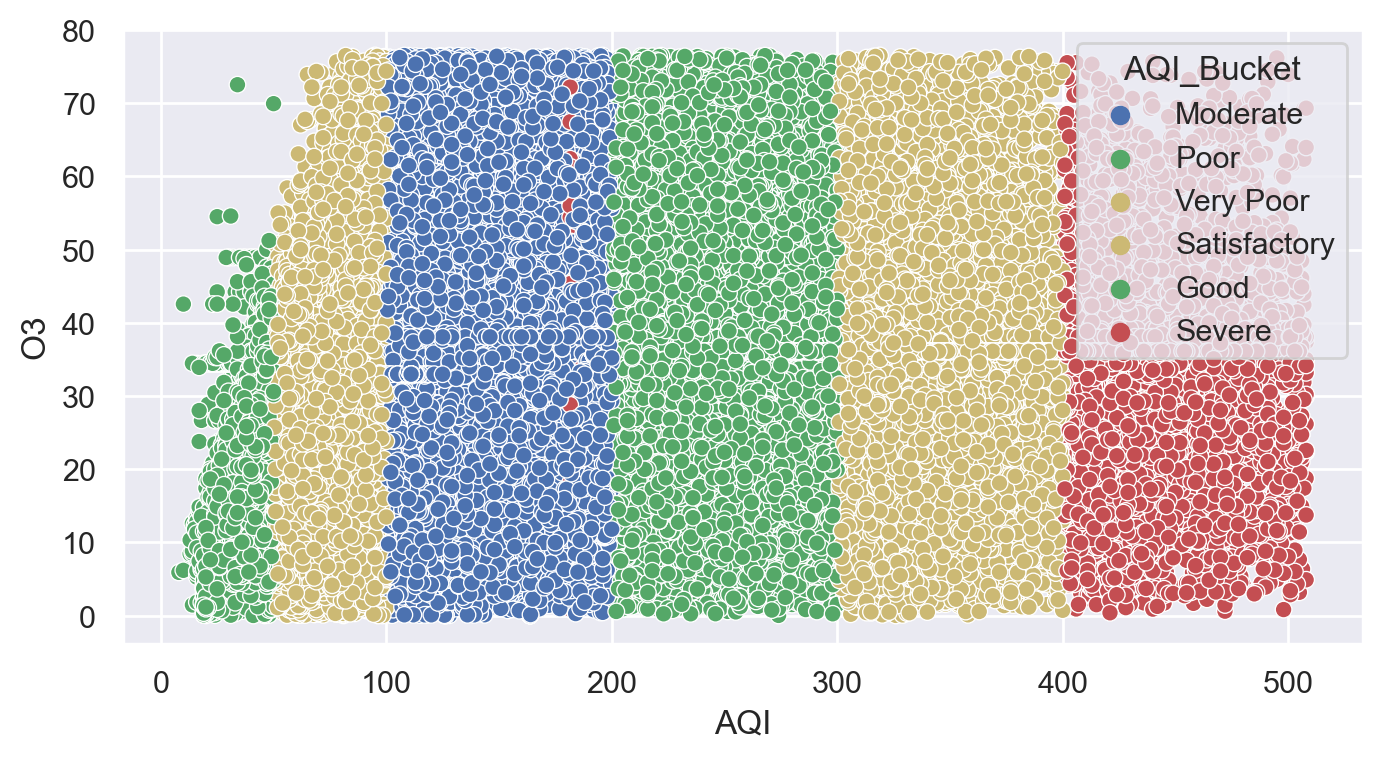

In [61]:
plt.figure(figsize=(8,4),dpi=200)
palette ={'Good': "g", 'Poor': "C2", 'Very Poor': "C8",'Severe': "r","Moderate": 'b',"Satisfactory":'y'}
sns.set(font_scale=1)
sns.scatterplot(x= 'AQI',y="O3", data=df_cleaned,hue ='AQI_Bucket',palette=palette)

In [62]:
eda_df["year"]=eda_df["Date"].dt.year

In [63]:
df2020=eda_df[eda_df['year'] == 2020].copy()

In [64]:
city_wise_AQI = df2020[['City','AQI']].groupby(['City']).mean().sort_values(['AQI'],ascending=False).reset_index()

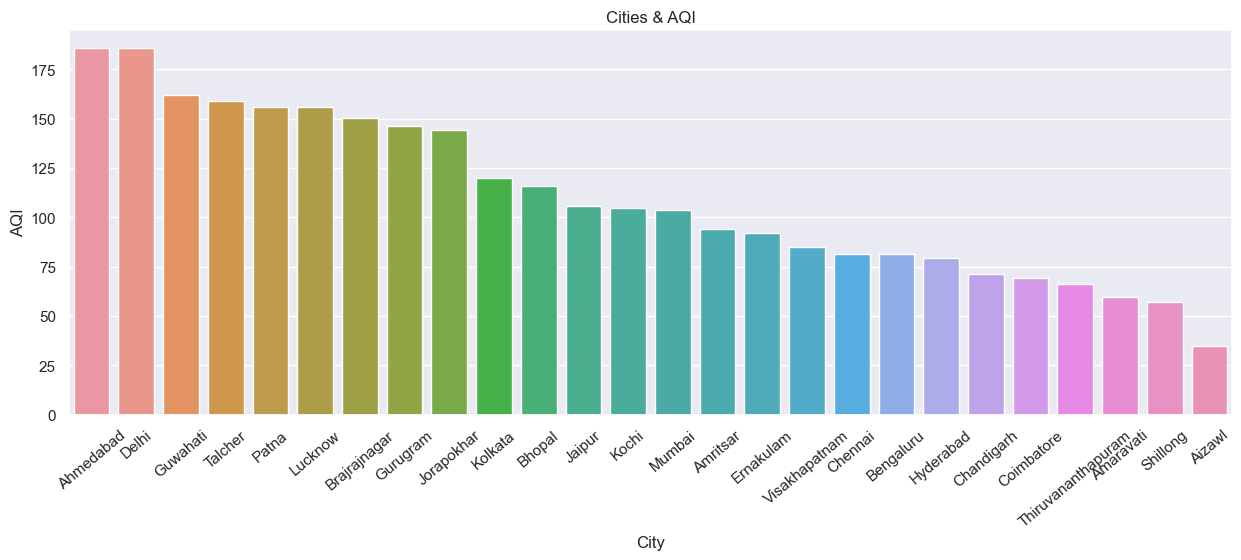

In [65]:
plt.figure(figsize=(15,5))
sns.set(font_scale=1)
sns.barplot(x='City', y='AQI', data=city_wise_AQI).set(title ='Cities & AQI')
plt.xticks(rotation=40)
plt.show()

In [66]:
top_5city = (df2020[['City','AQI']].groupby(['City']).mean().sort_values(['AQI'],ascending=False)).head().reset_index()
top_5city

City         AQI
0  Ahmedabad  185.814956
1      Delhi  185.737170
2   Guwahati  162.197802
3    Talcher  159.163736
4      Patna  156.169697

<Axes: xlabel='City', ylabel='AQI'>

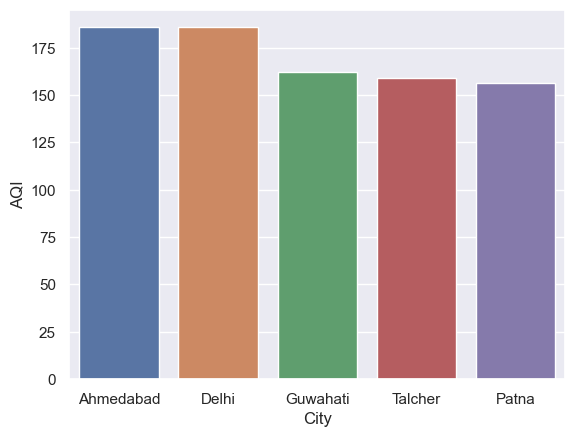

In [67]:
sns.barplot(data=top_5city,x=top_5city["City"],y="AQI")

In [68]:
top_cities=top_5city.merge(df2020.groupby(['City']).mean(), how='left', on="City")
top_cities["AQI"]=top_cities["AQI_x"]
top_cities=top_cities.drop(["AQI_x","AQI_y"],axis=1)
top_city_list=top_cities["City"]
top_cities

City      PM2.5        PM10         NO        NO2        NOx  \
0  Ahmedabad  43.508936  105.264197   9.488997  30.250931  21.670376   
1      Delhi  76.588798  163.653198  14.510840  32.233297  32.450852   
2   Guwahati  72.486735  125.480361  15.940977  14.478242  28.218571   
3    Talcher  62.948281  119.274404  15.667855  11.365088  16.531975   
4      Patna  63.214189  116.326251  22.798375  32.801353  33.898464   

         NH3        CO        SO2         O3  AQI_Rank    year         AQI  
0  21.030433  1.241107  14.078797  43.321118  2.401099  2020.0  185.814956  
1  33.914562  1.055661  12.655254  33.538572  2.638307  2020.0  185.737170  
2  12.424835  0.764361  14.581319  26.250714  3.115385  2020.0  162.197802  
3   7.780374  1.660654  13.261469  32.706880  2.890110  2020.0  159.163736  
4  19.677217  0.959803  11.556114  26.881553  2.985612  2020.0  156.169697

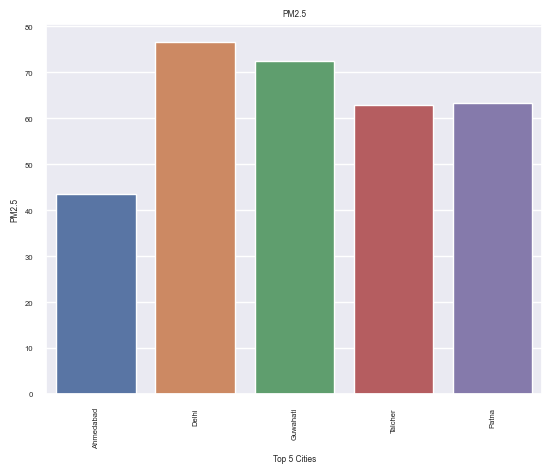

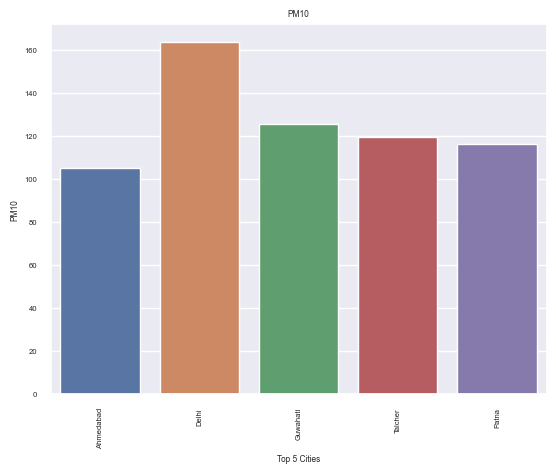

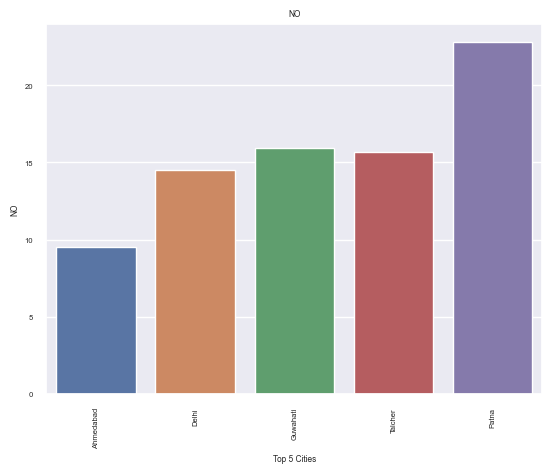

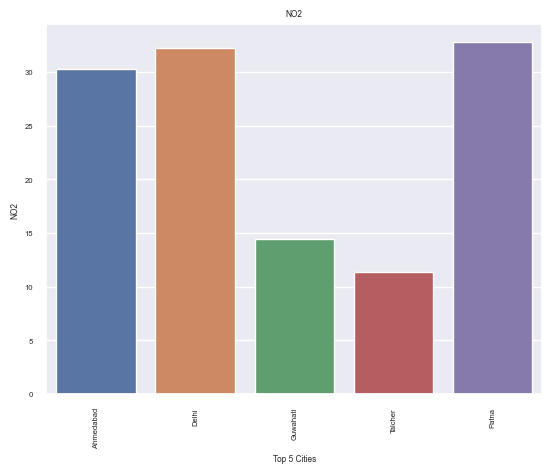

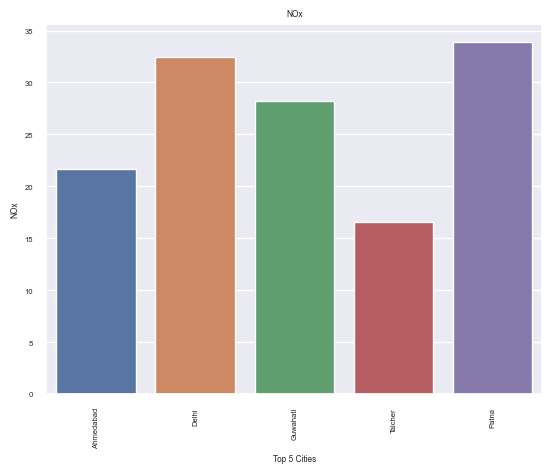

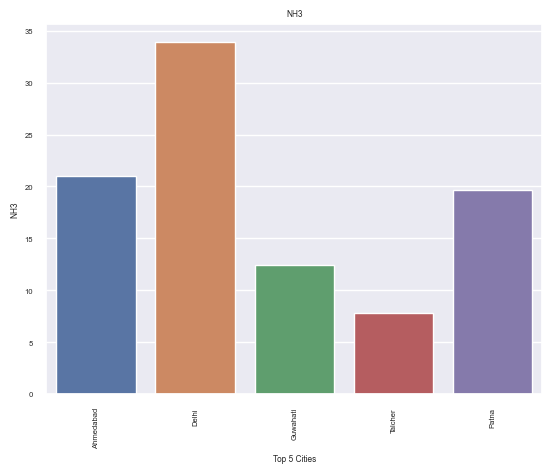

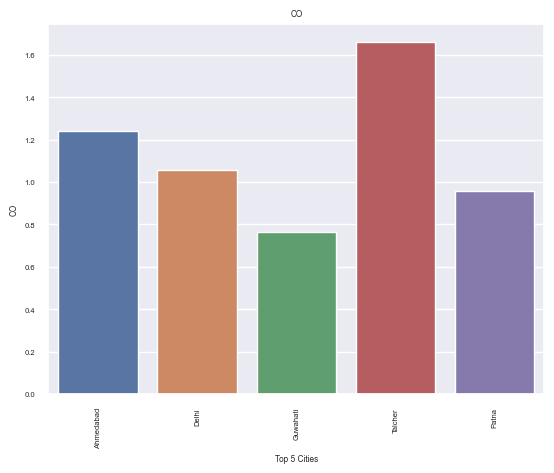

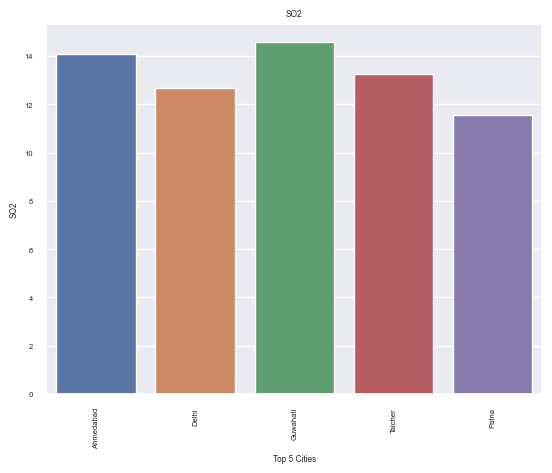

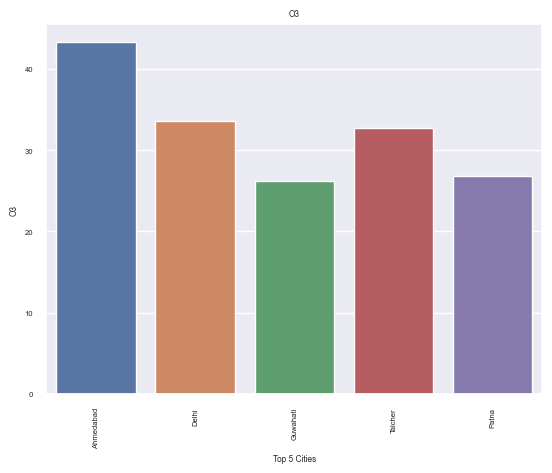

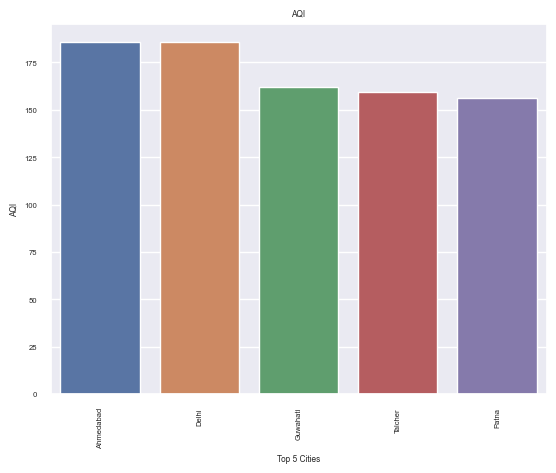

In [69]:
x=1
for i in num_col:
    #plt.subplot(4,3,x)
    sns.set(font_scale=0.5)
    sns.barplot(data=top_cities,x="City",y=i).set(title=i,xlabel="Top 5 Cities")
    plt.xticks(rotation=90)
    plt.show()
    #x=x+1
#plt.figure(figsize=(16,16))
#plt.tight_layout
#plt.show()

In [70]:
city_name="Delhi"

In [71]:
groupedcity_df=eda_df.groupby("City")

delhi=groupedcity_df.get_group((city_name))
delhi.drop(["City","Date"],axis=1,inplace=True)

[]

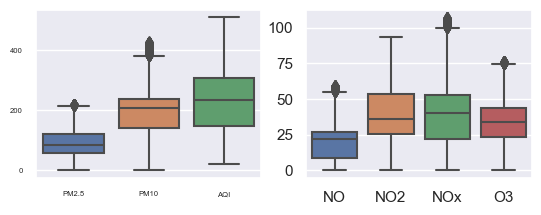

In [72]:
plt.subplot(2,2,1)
sns.set(font_scale=1)
sns.boxplot(data =delhi[["PM2.5","PM10","AQI"]], orient="v")
plt.subplot(2,2,2)
sns.set(font_scale=1)
sns.boxplot(data =delhi[['NO', 'NO2', 'NOx', 'O3']], orient="v")
plt.plot()

In [73]:
#Dataframe for ploting in plotly
plot_df=pd.DataFrame()
for i in num_col:
    plot_df[i]=eda_df[i]
    
plot_df["City"]=eda_df["City"]
plot_df = plot_df.groupby('City').mean().reset_index()

In [74]:
# Mean of pollution
import plotly.express as px

fig = px.treemap(pd.melt(plot_df, id_vars = 'City'), path=['City','variable'],
                 values=pd.melt(plot_df, id_vars = 'City')['value'],
                 title = 'Cities and the proportion of pollution in each')
fig.show()

## Delhi Data Cleaning

In [75]:
df1.drop(["Benzene","Toluene","Xylene","NO"],axis=1,inplace=True)
df1["Date"]=pd.to_datetime(df1["Datetime"])
df1.index = df1["Date"]
df1.drop(["Date"],axis=1,inplace=True)
df1.head()

StationId          Datetime  PM2.5   PM10    NO2    NOx  \
Date                                                                          
2020-06-30 23:00:00     AP001  30-06-2020 23:00  24.25  40.75  10.82   6.78   
2020-06-30 22:00:00     AP001  30-06-2020 22:00  30.25  49.00  17.10  10.20   
2020-06-30 21:00:00     AP001  30-06-2020 21:00  24.50  46.50  18.85  11.70   
2020-06-30 20:00:00     AP001  30-06-2020 20:00  28.75  39.00  14.05   8.68   
2020-06-30 19:00:00     AP001  30-06-2020 19:00  27.25  35.50  12.40   8.05   

                       NH3    CO    SO2     O3   AQI    AQI_Bucket  \
Date                                                                 
2020-06-30 23:00:00   8.75  0.61  11.12  31.77  55.0  Satisfactory   
2020-06-30 22:00:00   9.82  0.71  11.78  29.32  78.0  Satisfactory   
2020-06-30 21:00:00  10.25  0.74  12.85  34.98  78.0  Satisfactory   
2020-06-30 20:00:00   9.40  0.76  11.95  39.98  78.0  Satisfactory   
2020-06-30 19:00:00   9.10  0.66  12.75  50.35  78.0  Satisfactory   

                                        StationName       City  \
Date                                                             
2020-06-30 23:00:00  Secretariat, Amaravati - APPCB  Amaravati   
2020-06-30 22:00:00  Secretariat, Amaravati - APPCB  Amaravati   
2020-06-30 21:00:00  Secretariat, Amaravati - APPCB  Amaravati   
2020-06-30 20:00:00  Secretariat, Amaravati - APPCB  Amaravati   
2020-06-30 19:00:00  Secretariat, Amaravati - APPCB  Amaravati   

                              State  Status  
Date                                         
2020-06-30 23:00:00  Andhra Pradesh  Active  
2020-06-30 22:00:00  Andhra Pradesh  Active  
2020-06-30 21:00:00  Andhra Pradesh  Active  
2020-06-30 20:00:00  Andhra Pradesh  Active  
2020-06-30 19:00:00  Andhra Pradesh  Active

In [76]:
df1.shape

(1048488, 16)

In [77]:
grouped_df1=df1.groupby('StationId')
df_filled1=grouped_df1.transform(lambda x :x.fillna(x.mean()))

In [78]:
df_filled1.isnull().sum()

PM2.5     37235
PM10     178161
NO2           0
NOx       37235
NH3      322314
CO        37235
SO2      196880
O3        48191
AQI       37235
dtype: int64

In [79]:
groupedcity_df1=df1.groupby("City")

In [80]:
df_filled1=groupedcity_df1.transform(lambda x:x.fillna(x.mean()))

In [81]:
df_filled1.isnull().sum()

PM2.5    0
PM10     0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [82]:
df_temp=df1.select_dtypes(include="float64")
num_col=df_temp.columns

In [83]:
df_filled1.isnull().sum()

PM2.5    0
PM10     0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [84]:
for j in range(0,4):
    for i in num_col:
        df_filled1[i]=outlier_removed(df_filled1[i])

In [85]:
num_col

Index(['PM2.5', 'PM10', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'AQI'], dtype='object')

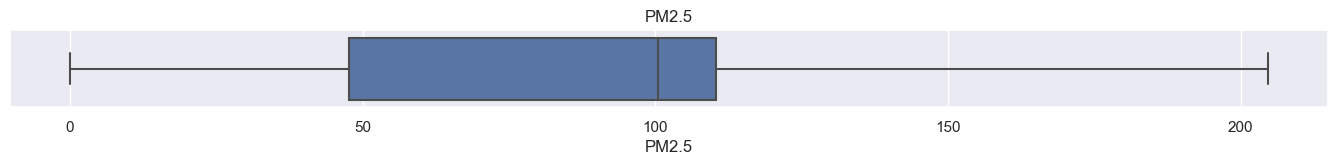

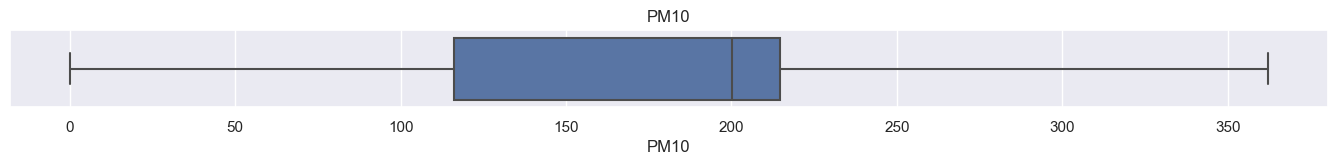

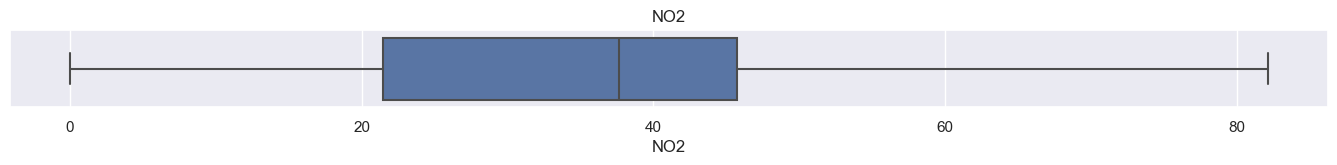

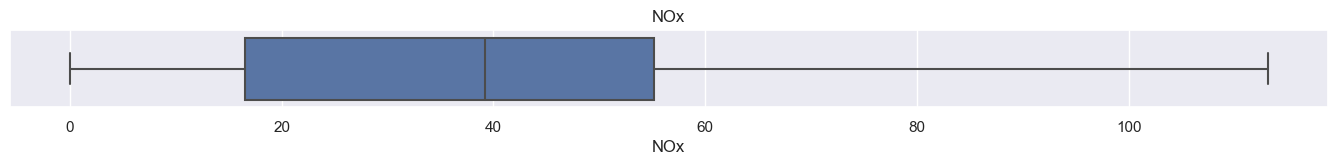

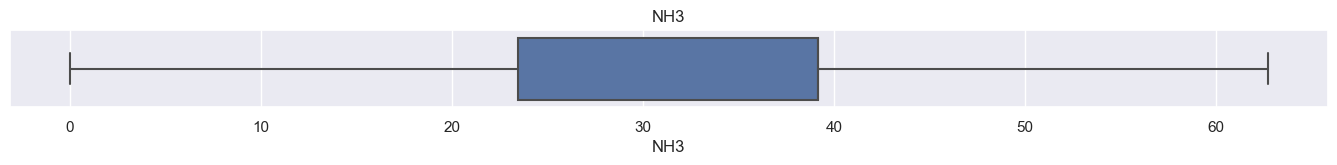

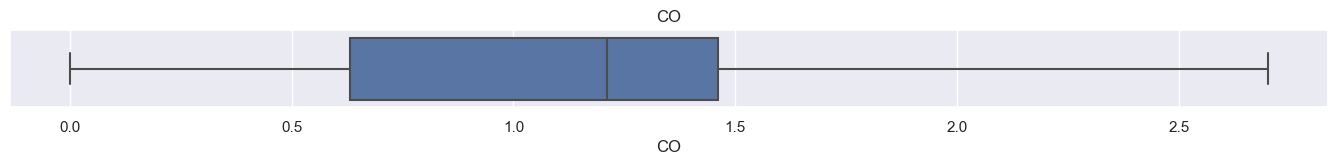

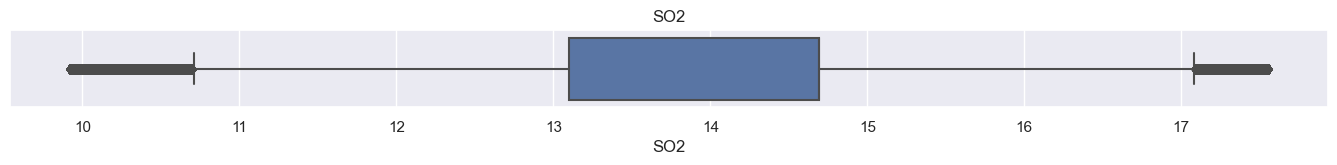

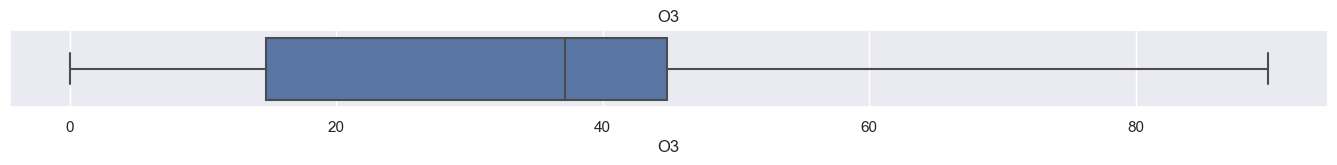

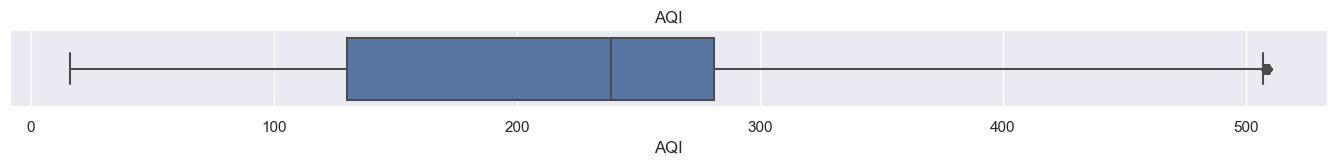

In [86]:
#Printing boxplot for each numerical column present in the data set
for i in num_col:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=df_filled1, x=i)
    plt.title(i)
plt.show()

In [87]:
df_filled1["city"]=df1["City"]
cities=list(df_filled1["city"].unique())

In [88]:
df_filled1.head()

PM2.5   PM10    NO2    NOx    NH3    CO    SO2     O3  \
Date                                                                         
2020-06-30 23:00:00  24.25  40.75  10.82   6.78   8.75  0.61  11.12  31.77   
2020-06-30 22:00:00  30.25  49.00  17.10  10.20   9.82  0.71  11.78  29.32   
2020-06-30 21:00:00  24.50  46.50  18.85  11.70  10.25  0.74  12.85  34.98   
2020-06-30 20:00:00  28.75  39.00  14.05   8.68   9.40  0.76  11.95  39.98   
2020-06-30 19:00:00  27.25  35.50  12.40   8.05   9.10  0.66  12.75  50.35   

                      AQI       city  
Date                                  
2020-06-30 23:00:00  55.0  Amaravati  
2020-06-30 22:00:00  78.0  Amaravati  
2020-06-30 21:00:00  78.0  Amaravati  
2020-06-30 20:00:00  78.0  Amaravati  
2020-06-30 19:00:00  78.0  Amaravati

In [89]:
#df["Date"]=pd.to_datetime(data["Datetime"])

## Delhi Time series Data

In [90]:
city_name="delhi"

In [91]:
groupedcity_df1=df_filled1.groupby("city")

In [92]:
delhi=groupedcity_df1.get_group(("Delhi"))

In [93]:
delhi.head()

PM2.5    PM10    NO2   NOx    NH3    CO        SO2  \
Date                                                                      
2020-06-30 23:00:00   81.0  181.75  15.30  7.95  32.55  0.78  10.680000   
2020-06-30 22:00:00   57.0  166.00  10.77  5.45  27.20  0.83  10.150000   
2020-06-30 21:00:00   42.5  152.25  10.12  4.95  28.02  0.57  13.626803   
2020-06-30 20:00:00   39.0  137.00   8.80  4.25  29.40  0.57  13.626803   
2020-06-30 19:00:00   40.5  130.75   8.60  4.33  36.58  0.55  13.626803   

                        O3    AQI   city  
Date                                      
2020-06-30 23:00:00   7.72  107.0  Delhi  
2020-06-30 22:00:00  10.07  106.0  Delhi  
2020-06-30 21:00:00  11.50  105.0  Delhi  
2020-06-30 20:00:00  13.10  104.0  Delhi  
2020-06-30 19:00:00  13.68  102.0  Delhi

In [94]:
delhi.drop(["city"],axis=1,inplace=True)

In [95]:
start_date="2018-01-01"
end_date="2019-12-31"
mask = (delhi.index >= start_date) & (delhi.index <= end_date)
selected_data =delhi.iloc[mask]
#selected_data = delhi[delhi.index <= end_date]
selected_data.shape

(515626, 9)

In [96]:
delhi_df = selected_data.resample('H').mean()

In [97]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)

imputed_data = knn_imputer.fit_transform(delhi_df)

In [98]:
delhi_imputed = pd.DataFrame(imputed_data, columns=delhi.columns,index=delhi_df.index)

In [99]:
delhi_imputed.isnull().sum()

PM2.5    0
PM10     0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [100]:
delhi_imputed.head()

PM2.5        PM10        NO2        NOx        NH3  \
Date                                                                           
2018-01-01 00:00:00  106.332259  204.148610  40.172516  20.281202  40.367463   
2018-01-01 01:00:00  110.196634  227.823205  40.627354  21.665978  40.117463   
2018-01-01 02:00:00  112.457098  228.919565  38.460964  20.017853  39.966213   
2018-01-01 03:00:00  117.045848  235.771440  41.419432  18.896603  40.009338   
2018-01-01 04:00:00  111.522884  216.171220  39.357557  20.585353  41.080802   

                           CO        SO2         O3         AQI  
Date                                                             
2018-01-01 00:00:00  0.984126  14.589456  35.309538  315.262069  
2018-01-01 01:00:00  1.063015  14.450500  36.323262  316.358936  
2018-01-01 02:00:00  1.061140  14.506026  38.893861  316.421436  
2018-01-01 03:00:00  1.069890  14.439650  39.877637  317.233936  
2018-01-01 04:00:00  1.038362  14.194629  38.555403  317.921436

In [101]:
delhi_df=delhi_imputed

## Implementing Machine Learning Model for Delhi Data

In [102]:
# Augmented Dickey Fuller Test
import statsmodels.api
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae

In [103]:
# Stability Test
def stability_test(series):
    result=statsmodels.tsa.stattools.adfuller(series,autolag="AIC")
    #print(result)
    if result[1]>=0.05:
        print("data is not stationary")
    else:
        print("procede data is Stationary")

In [104]:
for i in num_col:
    print(f"{i}")
    stability_test(delhi_df[i])

PM2.5
procede data is Stationary
PM10
procede data is Stationary
NO2
procede data is Stationary
NOx
procede data is Stationary
NH3
procede data is Stationary
CO
procede data is Stationary
SO2
procede data is Stationary
O3
procede data is Stationary
AQI
procede data is Stationary


In [105]:
# train test data split
tests=24
test=delhi_df[-tests:]
train=delhi_df[:-tests]

In [106]:
train

PM2.5        PM10        NO2        NOx        NH3  \
Date                                                                           
2018-01-01 00:00:00  106.332259  204.148610  40.172516  20.281202  40.367463   
2018-01-01 01:00:00  110.196634  227.823205  40.627354  21.665978  40.117463   
2018-01-01 02:00:00  112.457098  228.919565  38.460964  20.017853  39.966213   
2018-01-01 03:00:00  117.045848  235.771440  41.419432  18.896603  40.009338   
2018-01-01 04:00:00  111.522884  216.171220  39.357557  20.585353  41.080802   
...                         ...         ...        ...        ...        ...   
2019-12-29 20:00:00  106.019189  207.232282  46.643400  58.588534  37.076839   
2019-12-29 21:00:00  106.019189  206.853250  48.866157  58.816890  37.461143   
2019-12-29 22:00:00  106.019189  212.636532  46.575367  56.591713  38.093079   
2019-12-29 23:00:00  106.183344  202.991925  44.962475  58.846921  36.458774   
2019-12-30 00:00:00  106.183344  202.991925  46.186500  61.206483  36.296013   

                           CO        SO2         O3         AQI  
Date                                                             
2018-01-01 00:00:00  0.984126  14.589456  35.309538  315.262069  
2018-01-01 01:00:00  1.063015  14.450500  36.323262  316.358936  
2018-01-01 02:00:00  1.061140  14.506026  38.893861  316.421436  
2018-01-01 03:00:00  1.069890  14.439650  39.877637  317.233936  
2018-01-01 04:00:00  1.038362  14.194629  38.555403  317.921436  
...                       ...        ...        ...         ...  
2019-12-29 20:00:00  1.764008  13.886890  18.306872  362.012406  
2019-12-29 21:00:00  1.633649  13.881826  18.432033  354.462206  
2019-12-29 22:00:00  1.663649  14.170583  18.129130  345.835890  
2019-12-29 23:00:00  1.568560  14.106756  17.516226  346.784065  
2019-12-30 00:00:00  1.697936  14.066880  18.225568  339.067689  

[17473 rows x 9 columns]

In [107]:
test

PM2.5        PM10        NO2        NOx        NH3  \
Date                                                                           
2019-12-30 01:00:00  106.183344  202.991925  42.761671  62.854886  35.649239   
2019-12-30 02:00:00  106.183344  202.991925  39.446427  56.380322  36.631719   
2019-12-30 03:00:00  106.183344  212.735909  39.312306  56.315468  36.650217   
2019-12-30 04:00:00  106.183344  219.577692  39.355460  57.532565  37.042152   
2019-12-30 05:00:00  106.183344  224.906894  39.582639  58.217419  36.907848   
2019-12-30 06:00:00  114.938580  228.001201  39.231277  58.576805  35.879995   
2019-12-30 07:00:00  122.803410  234.643363  39.924908  57.733289  35.983332   
2019-12-30 08:00:00  127.821143  245.303114  39.512005  58.630079  34.144400   
2019-12-30 09:00:00  126.642958  236.296040  40.453201  56.324447  34.022142   
2019-12-30 10:00:00  128.928120  233.552967  42.404731  59.399433  33.687949   
2019-12-30 11:00:00  122.686876  233.053952  46.667145  64.495885  34.657997   
2019-12-30 12:00:00  114.436562  226.544313  48.509060  59.570792  38.287997   
2019-12-30 13:00:00  111.788985  212.971829  48.160547  64.869856  36.466555   
2019-12-30 14:00:00  106.347500  206.850391  49.865458  59.088857  35.877946   
2019-12-30 15:00:00  106.183344  210.605909  50.528049  61.736323  37.096010   
2019-12-30 16:00:00  106.183344  212.934941  49.825240  63.867470  36.944255   
2019-12-30 17:00:00  106.183344  202.991925  49.478166  56.962393  38.242823   
2019-12-30 18:00:00  106.019189  207.711336  51.633524  56.421763  36.877662   
2019-12-30 19:00:00  109.175557  212.192361  47.818947  53.500812  37.137127   
2019-12-30 20:00:00  107.897170  222.516724  45.582756  51.555650  37.420141   
2019-12-30 21:00:00  107.578461  231.942966  46.284212  49.505973  37.618781   
2019-12-30 22:00:00  116.215632  243.394749  43.107761  45.332747  38.365455   
2019-12-30 23:00:00  123.908609  242.173838  40.147438  41.883070  38.946211   
2019-12-31 00:00:00  128.866103  255.761218  36.135503  37.729844  37.381906   

                           CO        SO2         O3         AQI  
Date                                                             
2019-12-30 01:00:00  1.597184  13.972554  18.332665  340.995367  
2019-12-30 02:00:00  1.538151  13.698360  19.604909  342.678763  
2019-12-30 03:00:00  1.609943  14.191962  17.937503  352.593573  
2019-12-30 04:00:00  1.622775  14.218160  17.747503  343.150873  
2019-12-30 05:00:00  1.558244  13.793360  18.089116  352.238734  
2019-12-30 06:00:00  1.604804  13.656273  19.021684  342.272099  
2019-12-30 07:00:00  1.662581  13.919306  18.810716  345.288684  
2019-12-30 08:00:00  1.664696  13.714158  17.454278  343.534058  
2019-12-30 09:00:00  1.646689  13.731497  18.384264  341.704983  
2019-12-30 10:00:00  1.623929  13.770955  19.877167  340.382402  
2019-12-30 11:00:00  1.645807  13.793201  20.187167  339.176163  
2019-12-30 12:00:00  1.749513  13.866442  20.577813  338.414660  
2019-12-30 13:00:00  1.781126  13.804599  20.733632  338.099885  
2019-12-30 14:00:00  1.733778  13.580105  20.232019  338.439113  
2019-12-30 15:00:00  1.758603  13.729610  22.008458  330.237037  
2019-12-30 16:00:00  1.745176  13.728856  20.770084  322.836527  
2019-12-30 17:00:00  1.760251  13.919387  19.404600  318.075438  
2019-12-30 18:00:00  1.675176  13.681186  19.873296  320.204470  
2019-12-30 19:00:00  1.629298  13.461572  17.941052  312.713901  
2019-12-30 20:00:00  1.574137  13.500385  17.798794  302.899523  
2019-12-30 21:00:00  1.561413  13.641681  17.760084  320.316366  
2019-12-30 22:00:00  1.523527  13.774824  17.605568  345.568685  
2019-12-30 23:00:00  1.388939  13.550329  17.444923  367.858606  
2019-12-31 00:00:00  1.255714  13.335743  17.821052  370.139718

In [108]:
test_aqi=test["AQI"]
test_aqi

Date
2019-12-30 01:00:00    340.995367
2019-12-30 02:00:00    342.678763
2019-12-30 03:00:00    352.593573
2019-12-30 04:00:00    343.150873
2019-12-30 05:00:00    352.238734
2019-12-30 06:00:00    342.272099
2019-12-30 07:00:00    345.288684
2019-12-30 08:00:00    343.534058
2019-12-30 09:00:00    341.704983
2019-12-30 10:00:00    340.382402
2019-12-30 11:00:00    339.176163
2019-12-30 12:00:00    338.414660
2019-12-30 13:00:00    338.099885
2019-12-30 14:00:00    338.439113
2019-12-30 15:00:00    330.237037
2019-12-30 16:00:00    322.836527
2019-12-30 17:00:00    318.075438
2019-12-30 18:00:00    320.204470
2019-12-30 19:00:00    312.713901
2019-12-30 20:00:00    302.899523
2019-12-30 21:00:00    320.316366
2019-12-30 22:00:00    345.568685
2019-12-30 23:00:00    367.858606
2019-12-31 00:00:00    370.139718
Freq: H, Name: AQI, dtype: float64

### ARIMA Model

In [109]:
from statsmodels.tsa.arima.model import ARIMA

In [110]:
arima_pred=pd.DataFrame()
for i in num_col:
    model=ARIMA(train[i],order=(1,0,0))
    res=model.fit()
    #print(res.summary())
    
    #Prediction in Dataframe
    arima_pred[i]=res.predict(start="2019-12-30 01:00:00",end="2019-12-31 00:00:00")    

In [111]:
arima_pred

PM2.5        PM10        NO2        NOx        NH3  \
2019-12-30 01:00:00  105.368580  202.073489  45.474711  59.717822  36.187908   
2019-12-30 02:00:00  104.584058  201.190306  44.812556  58.331755  36.089926   
2019-12-30 03:00:00  103.828656  200.341024  44.196573  57.041211  36.001119   
2019-12-30 04:00:00  103.101294  199.524342  43.623543  55.839608  35.920628   
2019-12-30 05:00:00  102.400930  198.739007  43.090470  54.720816  35.847675   
2019-12-30 06:00:00  101.726562  197.983817  42.594569  53.679127  35.781552   
2019-12-30 07:00:00  101.077225  197.257615  42.133247  52.709229  35.721622   
2019-12-30 08:00:00  100.451991  196.559287  41.704093  51.806173  35.667303   
2019-12-30 09:00:00   99.849964  195.887765  41.304864  50.965353  35.618071   
2019-12-30 10:00:00   99.270284  195.242018  40.933474  50.182479  35.573449   
2019-12-30 11:00:00   98.712120  194.621059  40.587981  49.453559  35.533006   
2019-12-30 12:00:00   98.174674  194.023934  40.266579  48.774874  35.496349   
2019-12-30 13:00:00   97.657178  193.449730  39.967588  48.142962  35.463126   
2019-12-30 14:00:00   97.158889  192.897566  39.689446  47.554599  35.433013   
2019-12-30 15:00:00   96.679097  192.366597  39.430699  47.006784  35.405720   
2019-12-30 16:00:00   96.217113  191.856009  39.189995  46.496723  35.380983   
2019-12-30 17:00:00   95.772278  191.365019  38.966075  46.021814  35.358562   
2019-12-30 18:00:00   95.343954  190.892876  38.757769  45.579635  35.338241   
2019-12-30 19:00:00   94.931528  190.438856  38.563988  45.167928  35.319822   
2019-12-30 20:00:00   94.534411  190.002263  38.383720  44.784596  35.303129   
2019-12-30 21:00:00   94.152035  189.582429  38.216021  44.427681  35.287998   
2019-12-30 22:00:00   93.783851  189.178710  38.060017  44.095364  35.274285   
2019-12-30 23:00:00   93.429334  188.790487  37.914891  43.785950  35.261855   
2019-12-31 00:00:00   93.087976  188.417166  37.779884  43.497859  35.250590   

                           CO        SO2         O3         AQI  
2019-12-30 01:00:00  1.651918  14.033869  19.269986  337.730921  
2019-12-30 02:00:00  1.609565  14.009602  20.225503  336.410187  
2019-12-30 03:00:00  1.570585  13.991763  21.099687  335.105294  
2019-12-30 04:00:00  1.534710  13.978650  21.899460  333.816052  
2019-12-30 05:00:00  1.501692  13.969010  22.631157  332.542273  
2019-12-30 06:00:00  1.471304  13.961923  23.300571  331.283773  
2019-12-30 07:00:00  1.443337  13.956714  23.913005  330.040367  
2019-12-30 08:00:00  1.417597  13.952884  24.473308  328.811875  
2019-12-30 09:00:00  1.393907  13.950069  24.985918  327.598118  
2019-12-30 10:00:00  1.372104  13.948000  25.454895  326.398919  
2019-12-30 11:00:00  1.352038  13.946479  25.883953  325.214104  
2019-12-30 12:00:00  1.333570  13.945361  26.276489  324.043499  
2019-12-30 13:00:00  1.316573  13.944539  26.635612  322.886935  
2019-12-30 14:00:00  1.300929  13.943934  26.964167  321.744244  
2019-12-30 15:00:00  1.286532  13.943490  27.264756  320.615258  
2019-12-30 16:00:00  1.273281  13.943163  27.539758  319.499813  
2019-12-30 17:00:00  1.261086  13.942923  27.791352  318.397747  
2019-12-30 18:00:00  1.249862  13.942747  28.021530  317.308900  
2019-12-30 19:00:00  1.239532  13.942617  28.232115  316.233113  
2019-12-30 20:00:00  1.230025  13.942522  28.424776  315.170228  
2019-12-30 21:00:00  1.221275  13.942452  28.601037  314.120093  
2019-12-30 22:00:00  1.213222  13.942400  28.762295  313.082553  
2019-12-30 23:00:00  1.205811  13.942362  28.909826  312.057457  
2019-12-31 00:00:00  1.198989  13.942334  29.044800  311.044657

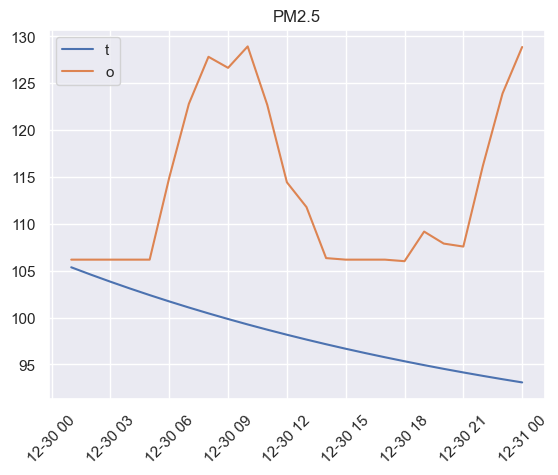

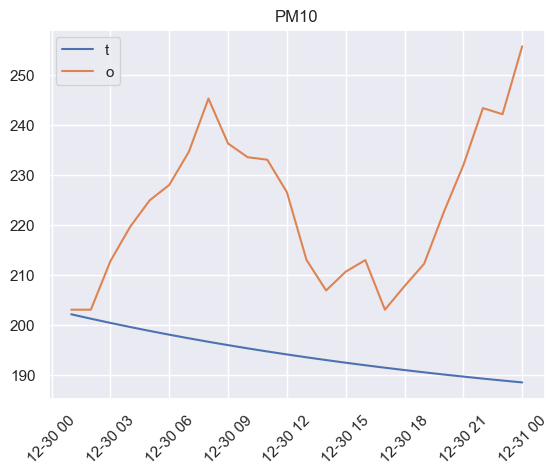

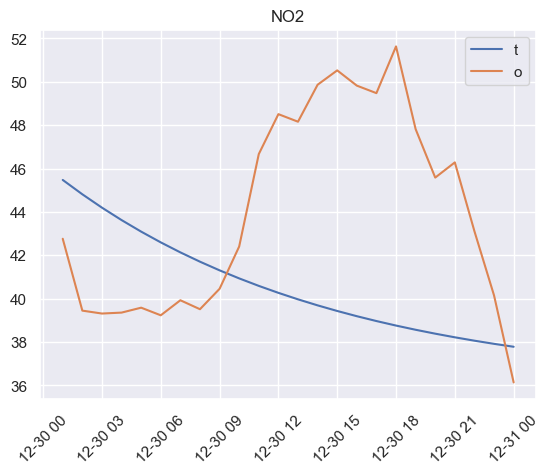

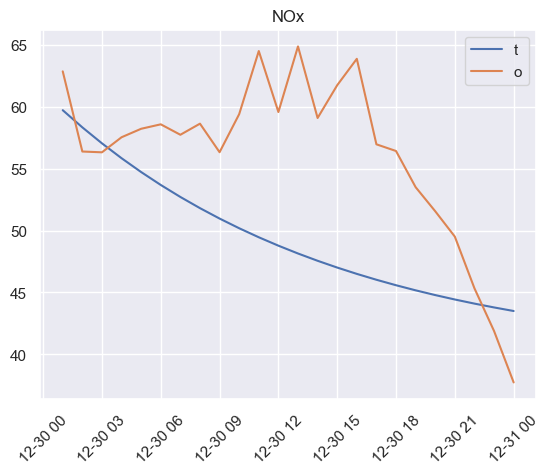

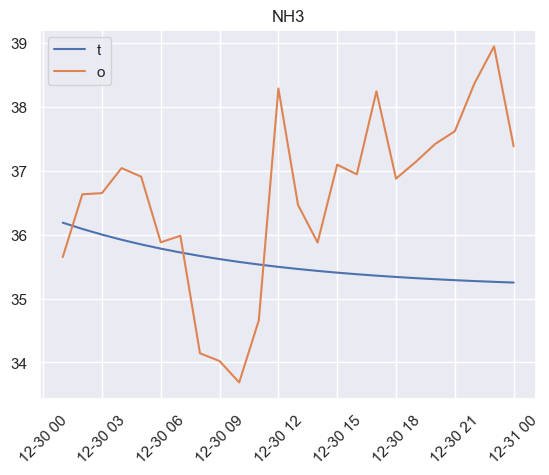

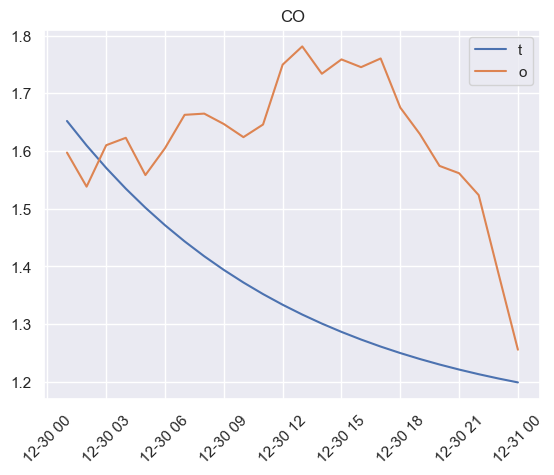

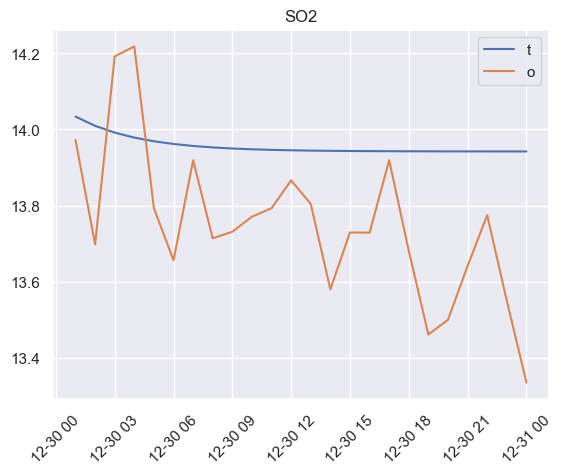

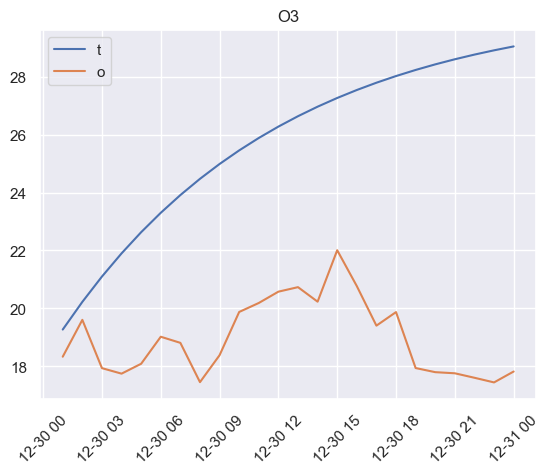

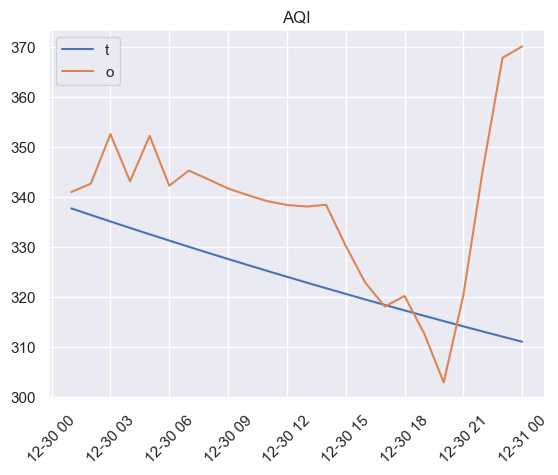

In [112]:
for i in num_col:
    plt.plot(arima_pred[i],label="predicted")
    plt.plot(test[i],label="test")
    plt.title(i)
    plt.legend("topright")
    plt.xticks(rotation=45)#plt.xticks(rotation=40)
    plt.show()

In [113]:
arima_mape=[]
for i in num_col:
    ar_m=mape(arima_pred[i],test[i])
    arima_mape.append(ar_m)
    
arima_mape_df=pd.DataFrame({"index":num_col,
               "arima_mape":arima_mape})

print(arima_mape_df)
arima_mape=arima_mape_df.arima_mape.mean()

   index  arima_mape
0  PM2.5    0.156293
1   PM10    0.151109
2    NO2    0.148084
3    NOx    0.155507
4    NH3    0.043773
5     CO    0.208146
6    SO2    0.017334
7     O3    0.250596
8    AQI    0.048207


In [114]:
print(f"\nOverall average Mean Average Percentage Error in ARIMA Model: {arima_mape}\n")


Overall average Mean Average Percentage Error in ARIMA Model: 0.13100534236132513



In [115]:
arima_aqi=arima_pred["AQI"]

In [116]:
arima_aqi

2019-12-30 01:00:00    337.730921
2019-12-30 02:00:00    336.410187
2019-12-30 03:00:00    335.105294
2019-12-30 04:00:00    333.816052
2019-12-30 05:00:00    332.542273
2019-12-30 06:00:00    331.283773
2019-12-30 07:00:00    330.040367
2019-12-30 08:00:00    328.811875
2019-12-30 09:00:00    327.598118
2019-12-30 10:00:00    326.398919
2019-12-30 11:00:00    325.214104
2019-12-30 12:00:00    324.043499
2019-12-30 13:00:00    322.886935
2019-12-30 14:00:00    321.744244
2019-12-30 15:00:00    320.615258
2019-12-30 16:00:00    319.499813
2019-12-30 17:00:00    318.397747
2019-12-30 18:00:00    317.308900
2019-12-30 19:00:00    316.233113
2019-12-30 20:00:00    315.170228
2019-12-30 21:00:00    314.120093
2019-12-30 22:00:00    313.082553
2019-12-30 23:00:00    312.057457
2019-12-31 00:00:00    311.044657
Freq: H, Name: AQI, dtype: float64

### VAR Model

In [117]:
model=statsmodels.tsa.vector_ar.var_model.VAR(train)

In [118]:
results=model.fit(24)

In [119]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 04, Aug, 2023
Time:                     06:32:17
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    13.8907
Nobs:                     17449.0    HQIC:                   13.3077
Log likelihood:          -334483.    FPE:                    451966.
AIC:                      13.0214    Det(Omega_mle):         404387.
--------------------------------------------------------------------
Results for equation PM2.5
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.131440         5.257840           -0.025           0.980
L1.PM2.5          1.016970         0.010236           99.349           0.000
L1.PM10           0.079144         0.005896           13.423           0.000

In [120]:
lagged_Values = train.values[-24:]

In [121]:
pred=results.forecast(y=lagged_Values,steps=24)

In [122]:
var_predicted=pd.DataFrame(pred,columns=num_col)
var_predicted.index=test.index
var_predicted["Act_AQI"]=test["AQI"]
var_predicted

PM2.5        PM10        NO2        NOx        NH3  \
Date                                                                           
2019-12-30 01:00:00  110.044880  208.154764  45.812992  59.944528  36.574094   
2019-12-30 02:00:00  114.936029  213.439921  44.730293  58.176160  36.888310   
2019-12-30 03:00:00  117.208534  213.247820  43.791622  56.091409  37.378468   
2019-12-30 04:00:00  117.891178  212.528993  42.996120  54.150979  37.579991   
2019-12-30 05:00:00  117.380045  212.343369  42.466523  53.258105  37.909490   
2019-12-30 06:00:00  116.446186  213.482268  42.450536  52.775580  37.790410   
2019-12-30 07:00:00  116.643543  212.918680  42.266253  52.610342  37.521809   
2019-12-30 08:00:00  116.182727  212.309462  42.066208  51.956682  37.120377   
2019-12-30 09:00:00  114.840885  212.456631  42.359080  51.547909  37.117761   
2019-12-30 10:00:00  112.712910  212.245352  42.707999  51.276916  36.949204   
2019-12-30 11:00:00  111.513660  211.730179  42.614812  50.627826  36.852029   
2019-12-30 12:00:00  112.228153  213.666903  42.174040  48.485294  36.563024   
2019-12-30 13:00:00  111.163294  213.115051  41.244123  45.937872  36.190004   
2019-12-30 14:00:00  106.851283  208.733049  40.470447  43.487652  36.368668   
2019-12-30 15:00:00  101.381806  201.776753  39.616608  41.304577  36.335323   
2019-12-30 16:00:00   98.153402  199.004697  40.359111  41.575377  36.521648   
2019-12-30 17:00:00   95.388881  198.900096  42.246105  44.513200  36.220497   
2019-12-30 18:00:00   96.314221  200.332812  43.242799  47.426662  36.115067   
2019-12-30 19:00:00   99.793505  203.304128  44.136196  50.164180  36.552022   
2019-12-30 20:00:00  103.332235  205.084198  45.062095  51.706213  36.731279   
2019-12-30 21:00:00  105.716200  207.405248  45.627127  52.678865  36.916508   
2019-12-30 22:00:00  107.698700  208.514192  45.918495  53.408211  37.409132   
2019-12-30 23:00:00  109.303390  209.532640  46.149293  53.409226  37.499337   
2019-12-31 00:00:00  110.604540  210.333509  45.757721  52.853177  37.568185   

                           CO        SO2         O3         AQI     Act_AQI  
Date                                                                         
2019-12-30 01:00:00  1.659476  13.963645  18.469433  336.847480  340.995367  
2019-12-30 02:00:00  1.612084  13.904563  18.148456  335.980793  342.678763  
2019-12-30 03:00:00  1.540125  13.878389  18.826603  337.084266  352.593573  
2019-12-30 04:00:00  1.475719  13.866381  20.240686  335.320006  343.150873  
2019-12-30 05:00:00  1.450932  13.834853  21.310205  333.165274  352.238734  
2019-12-30 06:00:00  1.450516  13.787273  21.115025  332.596873  342.272099  
2019-12-30 07:00:00  1.449736  13.787170  22.100888  331.791742  345.288684  
2019-12-30 08:00:00  1.434928  13.781288  22.747857  330.015197  343.534058  
2019-12-30 09:00:00  1.444094  13.789315  23.139390  328.005268  341.704983  
2019-12-30 10:00:00  1.443062  13.795023  23.472171  326.264320  340.382402  
2019-12-30 11:00:00  1.445962  13.806009  25.120299  326.898197  339.176163  
2019-12-30 12:00:00  1.413175  13.830972  28.483846  327.070384  338.414660  
2019-12-30 13:00:00  1.371402  13.826947  31.927365  328.327698  338.099885  
2019-12-30 14:00:00  1.321197  13.833249  35.272565  326.061372  338.439113  
2019-12-30 15:00:00  1.273966  13.832606  37.939678  323.352733  330.237037  
2019-12-30 16:00:00  1.279188  13.779734  37.921245  323.575897  322.836527  
2019-12-30 17:00:00  1.346875  13.737734  33.946854  322.574261  318.075438  
2019-12-30 18:00:00  1.422878  13.718586  28.264231  321.523800  320.204470  
2019-12-30 19:00:00  1.486439  13.781167  24.538007  321.558252  312.713901  
2019-12-30 20:00:00  1.520831  13.816230  22.200295  320.283640  302.899523  
2019-12-30 21:00:00  1.532953  13.862043  20.281913  319.480871  320.316366  
2019-12-30 22:00:00  1.548653  13.883931  19.352998  317.939347  345.568685  
2019-12-30 23:00:00  1.542552  13.897501  19.028237  314.977696  367.8586

In [123]:
##Residual collection 
test_model=statsmodels.tsa.vector_ar.var_model.VAR(test)

In [124]:
#test_result=test_model.fit()
#test_result.summary()

In [125]:
#residuals = test_result.resid
#var_residual=residuals["AQI"]
#var_residual.shape

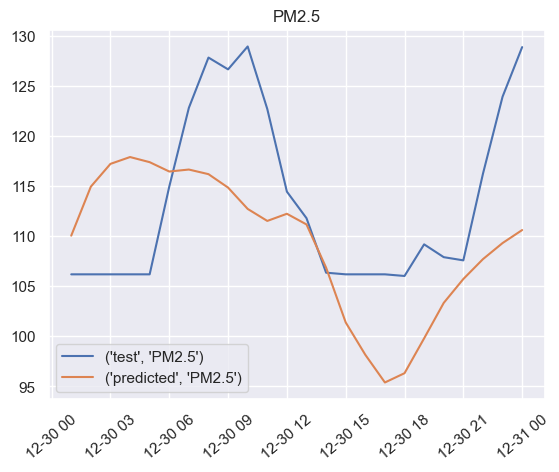

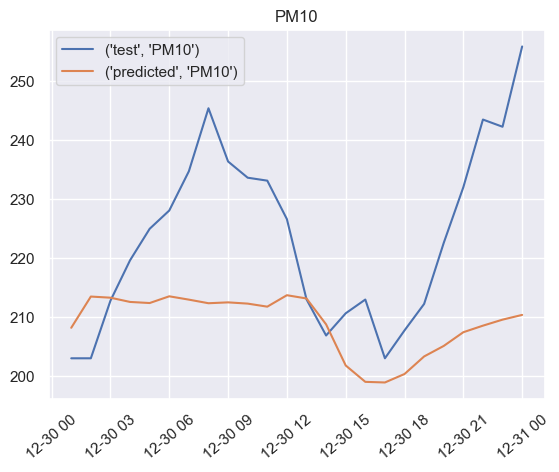

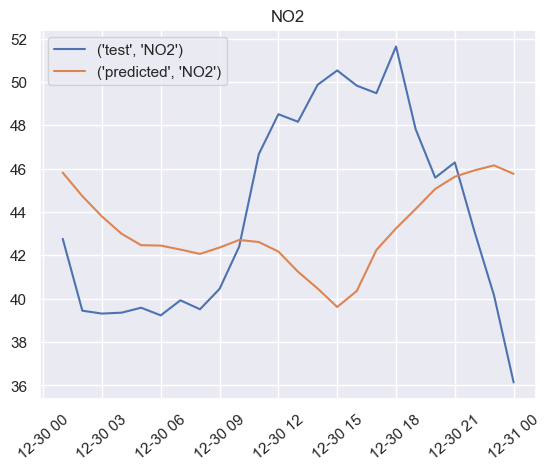

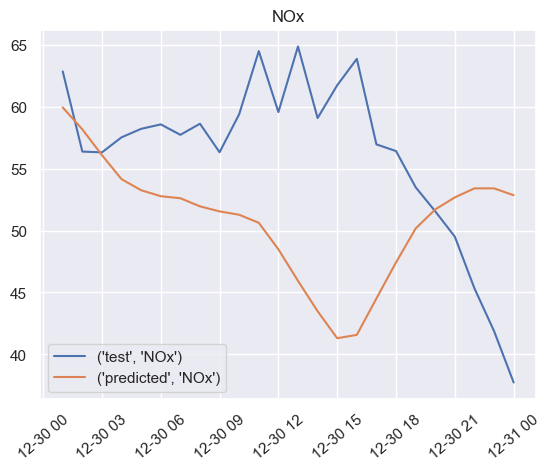

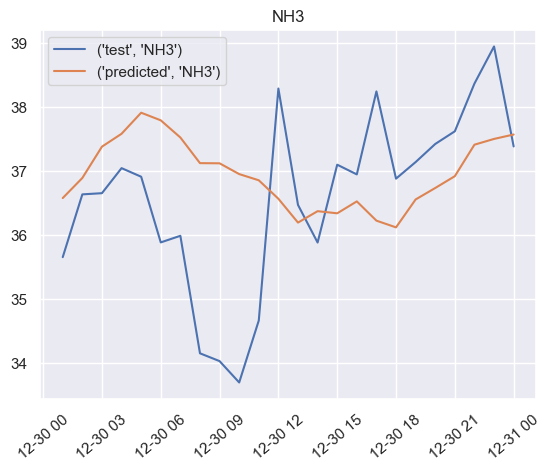

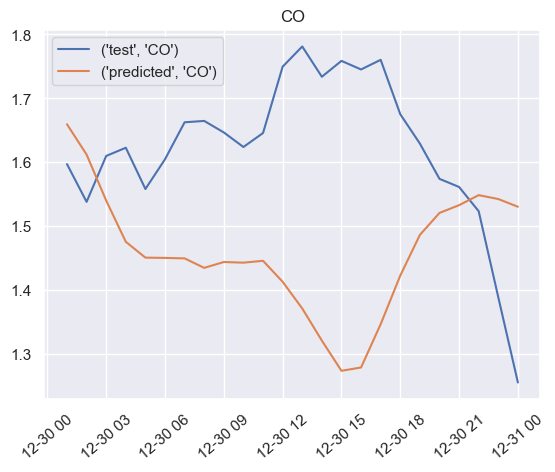

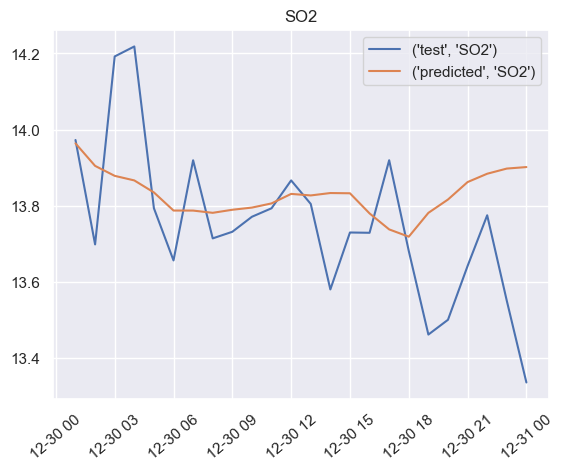

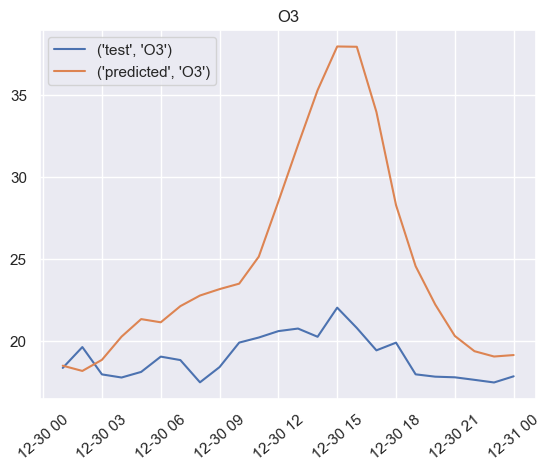

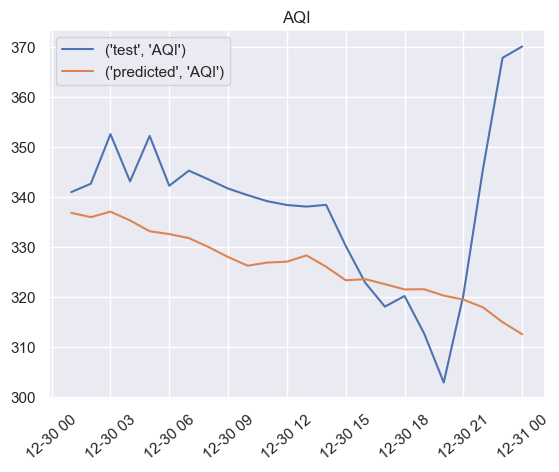

In [126]:
for i in num_col:
    plt.plot(test[i],label=("test", i))
    plt.plot(var_predicted[i],label=("predicted", i))
    plt.title(i)
    plt.legend()
    plt.xticks(rotation=40)
    plt.show()

In [127]:
num_col

Index(['PM2.5', 'PM10', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'AQI'], dtype='object')

In [128]:
l1=[]
l2=[]
for i in num_col:
    m=mape(var_predicted[i],test[i])
    l1.append(i)
    l2.append(m)
ovrl_mape=pd.DataFrame({"index":l1,
                        "mape":l2})
ovrl_mape=pd.DataFrame(ovrl_mape)
print(ovrl_mape)
var_mape=ovrl_mape["mape"].mean()
print(f"\n\nOverall average in VAR Model:{var_mape}")

   index      mape
0  PM2.5  0.075812
1   PM10  0.076435
2    NO2  0.113122
3    NOx  0.182592
4    NH3  0.033169
5     CO  0.151772
6    SO2  0.011763
7     O3  0.205406
8    AQI  0.044152


Overall average in VAR Model:0.09935805773347406


In [129]:
var_aqi=var_predicted["AQI"]
var_aqi

Date
2019-12-30 01:00:00    336.847480
2019-12-30 02:00:00    335.980793
2019-12-30 03:00:00    337.084266
2019-12-30 04:00:00    335.320006
2019-12-30 05:00:00    333.165274
2019-12-30 06:00:00    332.596873
2019-12-30 07:00:00    331.791742
2019-12-30 08:00:00    330.015197
2019-12-30 09:00:00    328.005268
2019-12-30 10:00:00    326.264320
2019-12-30 11:00:00    326.898197
2019-12-30 12:00:00    327.070384
2019-12-30 13:00:00    328.327698
2019-12-30 14:00:00    326.061372
2019-12-30 15:00:00    323.352733
2019-12-30 16:00:00    323.575897
2019-12-30 17:00:00    322.574261
2019-12-30 18:00:00    321.523800
2019-12-30 19:00:00    321.558252
2019-12-30 20:00:00    320.283640
2019-12-30 21:00:00    319.480871
2019-12-30 22:00:00    317.939347
2019-12-30 23:00:00    314.977696
2019-12-31 00:00:00    312.556255
Freq: H, Name: AQI, dtype: float64

## Results of ARIMA & VAR Model 

In [130]:
print(arima_mape_df)

   index  arima_mape
0  PM2.5    0.156293
1   PM10    0.151109
2    NO2    0.148084
3    NOx    0.155507
4    NH3    0.043773
5     CO    0.208146
6    SO2    0.017334
7     O3    0.250596
8    AQI    0.048207


In [131]:
print(f"\nARIMA Model\nOverall Mean Average Percentage Error : {arima_mape}\n")


ARIMA Model
Overall Mean Average Percentage Error : 0.13100534236132513



In [132]:
print(ovrl_mape)

   index      mape
0  PM2.5  0.075812
1   PM10  0.076435
2    NO2  0.113122
3    NOx  0.182592
4    NH3  0.033169
5     CO  0.151772
6    SO2  0.011763
7     O3  0.205406
8    AQI  0.044152


In [133]:
print(f"\nVAR Model\nOverall Mean Abs Percentage Error:{var_mape}")


VAR Model
Overall Mean Abs Percentage Error:0.09935805773347406


## XG Boosting

In [134]:
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error as mape

In [135]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
 n_vars = 1 if type(data) is list else data.shape[1]
 df = DataFrame(data)
 cols = list()
 # input sequence (t-n, ... t-1)
 for i in range(n_in, 0, -1):
     cols.append(df.shift(i))
 # forecast sequence (t, t+1, ... t+n)
 for i in range(0, n_out):
     cols.append(df.shift(-i))
 # put it all together
     agg = concat(cols, axis=1)
 # drop rows with NaN values
 if dropnan:
     agg.dropna(inplace=True)
 return agg.values

In [136]:
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
 return data[:-n_test, :], data[-n_test:, :]

In [137]:
# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
 # transform list into array
 train = asarray(train)
 # split into input and output columns
 trainX, trainy = train[:, :-1], train[:, -1]
 # fit model
 model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
 model.fit(trainX, trainy)
 # make a one-step prediction
 yhat = model.predict(asarray([testX]))
 return yhat[0]
 

In [138]:
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
 predictions = list()
 # split dataset
 train, test = train_test_split(data, n_test)
 # seed history with training dataset
 history = [x for x in train]
 # step over each time-step in the test set
 for i in range(len(test)):
 # split test row into input and output columns
     testX, testy = test[i, :-1], test[i, -1]
 # fit model on history and make a prediction
     yhat = xgboost_forecast(history, testX)
 # store forecast in list of predictions
     predictions.append(yhat)
 # add actual observation to history for the next loop
     history.append(test[i])
 # summarize progress
     print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
 # estimate prediction error
 error = mape(test[:, -1], predictions)
 return error, test[:, -1], predictions


In [139]:
dataframe=pd.DataFrame(delhi_df["AQI"])
# load the dataset
series = dataframe
values = series.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=24)

In [140]:
# evaluate
mae, y, yhat = walk_forward_validation(data, 24)
print('MAE: %.3f' % mae)

>expected=341.0, predicted=335.0
>expected=342.7, predicted=338.8
>expected=352.6, predicted=346.2
>expected=343.2, predicted=354.9
>expected=352.2, predicted=340.3
>expected=342.3, predicted=347.3
>expected=345.3, predicted=341.3
>expected=343.5, predicted=341.1
>expected=341.7, predicted=321.5
>expected=340.4, predicted=339.8
>expected=339.2, predicted=340.2
>expected=338.4, predicted=327.1
>expected=338.1, predicted=337.4
>expected=338.4, predicted=337.5
>expected=330.2, predicted=338.6
>expected=322.8, predicted=326.6
>expected=318.1, predicted=317.2
>expected=320.2, predicted=306.9
>expected=312.7, predicted=316.1
>expected=302.9, predicted=308.9
>expected=320.3, predicted=299.8
>expected=345.6, predicted=304.4
>expected=367.9, predicted=348.8
>expected=370.1, predicted=365.4
MAE: 0.025


In [141]:
xgbt_mape=mape(y,yhat)
xgbt_mape

0.025411143854528532

In [142]:
y

array([340.99536724, 342.67876329, 352.59357292, 343.15087284,
       352.23873421, 342.27209943, 345.28868432, 343.53405785,
       341.70498283, 340.38240218, 339.17616281, 338.41466024,
       338.09988527, 338.43911264, 330.23703675, 322.83652717,
       318.07543814, 320.2044704 , 312.71390091, 302.89952342,
       320.31636617, 345.56868469, 367.85860618, 370.13971815])

In [143]:
xgbst_aqi=list(yhat)

In [144]:
yhat

[335.0394,
 338.75983,
 346.20923,
 354.86362,
 340.27994,
 347.28793,
 341.34488,
 341.1113,
 321.45877,
 339.79062,
 340.22885,
 327.0559,
 337.42902,
 337.52283,
 338.61185,
 326.6045,
 317.2374,
 306.9374,
 316.11398,
 308.8649,
 299.7648,
 304.42975,
 348.84833,
 365.4224]

## LSTM Model

In [145]:
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [146]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)


In [147]:
# fix random seed for reproducibility
tf.random.set_seed(7)

# load the dataset
dataframe=pd.DataFrame(delhi_df["AQI"])
dataset = dataframe.values
#dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


In [148]:
# split into train and test sets
train_size = int(len(dataset) -26)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0],1,testX.shape[1]))

In [149]:
# create and fit the LSTM network
LSTM_model = Sequential()
LSTM_model.add(LSTM(4, input_shape=(1, look_back)))
LSTM_model.add(Dense(1))
LSTM_model.compile(loss='mean_squared_error', optimizer='adam')
LSTM_model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
17469/17469 - 57s - loss: 0.0046 - 57s/epoch - 3ms/step
Epoch 2/100
17469/17469 - 53s - loss: 0.0016 - 53s/epoch - 3ms/step
Epoch 3/100
17469/17469 - 54s - loss: 0.0016 - 54s/epoch - 3ms/step
Epoch 4/100
17469/17469 - 54s - loss: 0.0016 - 54s/epoch - 3ms/step
Epoch 5/100
17469/17469 - 53s - loss: 0.0016 - 53s/epoch - 3ms/step
Epoch 6/100
17469/17469 - 53s - loss: 0.0016 - 53s/epoch - 3ms/step
Epoch 7/100
17469/17469 - 54s - loss: 0.0016 - 54s/epoch - 3ms/step
Epoch 8/100
17469/17469 - 54s - loss: 0.0016 - 54s/epoch - 3ms/step
Epoch 9/100
17469/17469 - 54s - loss: 0.0016 - 54s/epoch - 3ms/step
Epoch 10/100
17469/17469 - 55s - loss: 0.0016 - 55s/epoch - 3ms/step
Epoch 11/100
17469/17469 - 54s - loss: 0.0016 - 54s/epoch - 3ms/step
Epoch 12/100
17469/17469 - 53s - loss: 0.0016 - 53s/epoch - 3ms/step
Epoch 13/100
17469/17469 - 53s - loss: 0.0016 - 53s/epoch - 3ms/step
Epoch 14/100
17469/17469 - 54s - loss: 0.0016 - 54s/epoch - 3ms/step
Epoch 15/100
17469/17469 - 54s - loss: 0.00

In [150]:
# make predictions
trainPredict = LSTM_model.predict(trainX)
testPredict = LSTM_model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

1/1 [==============================] - 0s 40ms/step


In [151]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [152]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

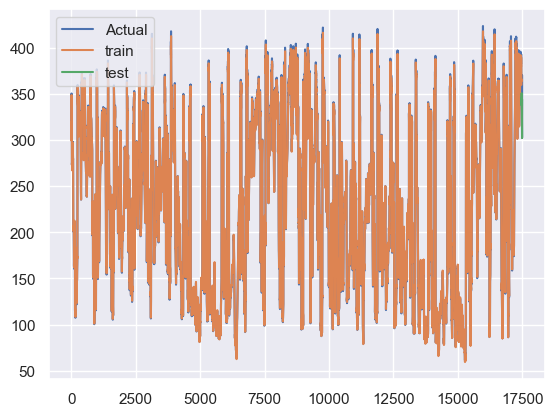

In [153]:

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset),label="Actual")
plt.plot(trainPredictPlot,label="train")
plt.plot(testPredictPlot,label="test")
plt.legend()
plt.show()

In [154]:
LSTM_aqi_res=testPredict.flatten()
LSTM_aqi=list(LSTM_aqi_res[:24])
len(LSTM_aqi)

24

## LSTM Result

In [155]:
from sklearn.metrics import mean_absolute_percentage_error as mappe

In [156]:
# calculate root mean squared error
LSTM_train_mape = (mape(trainY[0], trainPredict[:,0]))
print('LSTM Train Score: %.2f MAPE' % (LSTM_train_mape))
LSTM_testScore = (mape(testY[0], testPredict[:,0]))
print('LSTM Test Score: %.2f MAPE' % (LSTM_testScore))

LSTM Train Score: 0.02 MAPE
LSTM Test Score: 0.02 MAPE


In [157]:
result_df=pd.DataFrame()
result_df["var"]=var_aqi
result_df["LSTM"]=testPredict.flatten()
result_df["xgbst"]=yhat
result_df["test"]=testY[0].flatten()

In [158]:
result_df["LSTM_test"]=testY[0]
result_df["xg_test"]=y

In [159]:
result_df

var        LSTM       xgbst        test  \
Date                                                                  
2019-12-30 01:00:00  336.847480  345.172974  335.039398  339.067689   
2019-12-30 02:00:00  335.980793  337.643250  338.759827  340.995367   
2019-12-30 03:00:00  337.084266  339.526794  346.209229  342.678763   
2019-12-30 04:00:00  335.320006  341.170319  354.863617  352.593573   
2019-12-30 05:00:00  333.165274  350.823090  340.279938  343.150873   
2019-12-30 06:00:00  332.596873  341.630981  347.287933  352.238734   
2019-12-30 07:00:00  331.791742  350.478516  341.344879  342.272099   
2019-12-30 08:00:00  330.015197  340.773376  341.111298  345.288684   
2019-12-30 09:00:00  328.005268  343.715942  321.458771  343.534058   
2019-12-30 10:00:00  326.264320  342.004883  339.790619  341.704983   
2019-12-30 11:00:00  326.898197  340.219757  340.228851  340.382402   
2019-12-30 12:00:00  327.070384  338.928070  327.055908  339.176163   
2019-12-30 13:00:00  328.327698  337.749268  337.429016  338.414660   
2019-12-30 14:00:00  326.061372  337.004791  337.522827  338.099885   
2019-12-30 15:00:00  323.352733  336.697021  338.611847  338.439113   
2019-12-30 16:00:00  323.575897  337.028717  326.604492  330.237037   
2019-12-30 17:00:00  322.574261  328.995972  317.237396  322.836527   
2019-12-30 18:00:00  321.523800  321.728546  306.937408  318.075438   
2019-12-30 19:00:00  321.558252  317.044922  316.113983  320.204470   
2019-12-30 20:00:00  320.283640  319.140045  308.864899  312.713901   
2019-12-30 21:00:00  319.480871  311.764252  299.764801  302.899523   
2019-12-30 22:00:00  317.939347  302.084534  304.429749  320.316366   
2019-12-30 23:00:00  314.977696  319.250092  348.848328  345.568685   
2019-12-31 00:00:00  312.556255  343.988800  365.422394  367.858606   

                      LSTM_test     xg_test  
Date                                         
2019-12-30 01:00:00  339.067689  340.995367  
2019-12-30 02:00:00  340.995367  342.678763  
2019-12-30 03:00:00  342.678763  352.593573  
2019-12-30 04:00:00  352.593573  343.150873  
2019-12-30 05:00:00  343.150873  352.238734  
2019-12-30 06:00:00  352.238734  342.272099  
2019-12-30 07:00:00  342.272099  345.288684  
2019-12-30 08:00:00  345.288684  343.534058  
2019-12-30 09:00:00  343.534058  341.704983  
2019-12-30 10:00:00  341.704983  340.382402  
2019-12-30 11:00:00  340.382402  339.176163  
2019-12-30 12:00:00  339.176163  338.414660  
2019-12-30 13:00:00  338.414660  338.099885  
2019-12-30 14:00:00  338.099885  338.439113  
2019-12-30 15:00:00  338.439113  330.237037  
2019-12-30 16:00:00  330.237037  322.836527  
2019-12-30 17:00:00  322.836527  318.075438  
2019-12-30 18:00:00  318.075438  320.204470  
2019-12-30 19:00:00  320.204470  312.713901  
2019-12-30 20:00:00  312.713901  302.899523  
2019-12-30 21:00:00  302.899523  320.316366  
2019-12-30 22:00:00  320.316366  345.568685  
2019-12-30 23:00:00  345.568685  367.858606  
2019-12-31 00:00:00  367.858606  370.139718

In [160]:
#hybrid_mape=mape(df_hybrid["Actual"],df_hybrid["hybrid"])
xgbst_mape = (mape(result_df["LSTM_test"],result_df["LSTM"]))
print('Xg boost MAPE: %.2f MApE' % (xgbst_mape))

Xg boost MAPE: 0.02 MApE


In [161]:
#hybrid_mape=mape(df_hybrid["Actual"],df_hybrid["hybrid"])
lstm_mape = (mape(result_df["xg_test"],result_df["xgbst"]))
print('LSTM MAPE: %.2f MAPE' % (lstm_mape))

LSTM MAPE: 0.03 MAPE


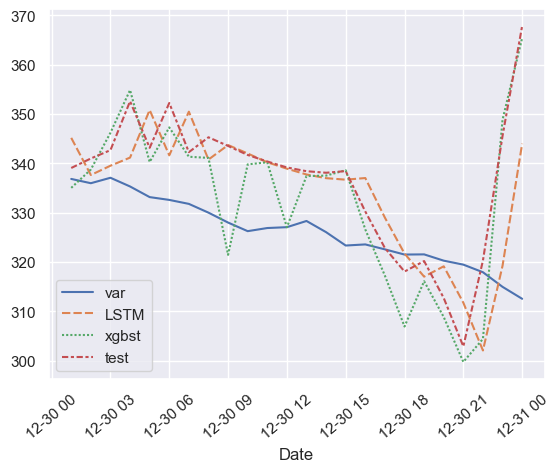

In [162]:
sns.lineplot(result_df[["var","LSTM","xgbst","test"]])
plt.xticks(rotation=40)
plt.show()

In [163]:
result_score_df=pd.DataFrame({"Model":["VAR","Xg_boost","LSTM"],
                              "MAPE":[var_mape,xgbst_mape,lstm_mape]})

In [164]:
result_score_df.index=result_score_df["Model"]
result_score_df=result_score_df.drop(["Model"],axis=1)
result_score_df

MAPE
Model             
VAR       0.099358
Xg_boost  0.020030
LSTM      0.025411

In [165]:
result_rounded_df=pd.DataFrame({"Model":["VAR","Xg_boost","LSTM"],
                              "MAPE":[round(var_mape*100,2),round(xgbst_mape*100,2),round(lstm_mape*100,2)]})
result_rounded_df

Model  MAPE
0       VAR  9.94
1  Xg_boost  2.00
2      LSTM  2.54

Text(0.5, 1.0, 'MAPE Error comparision')

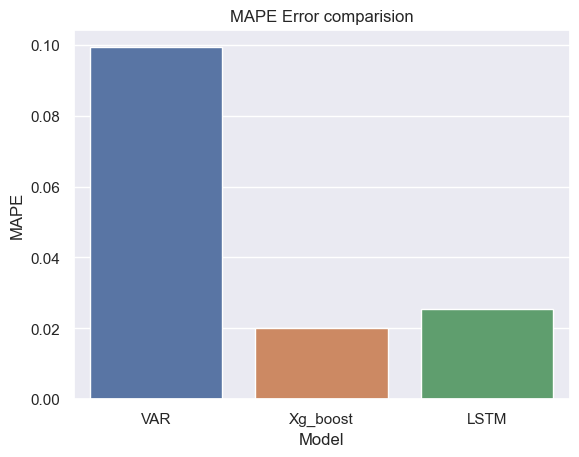

In [167]:
sns.barplot(result_score_df,y=result_score_df["MAPE"],x=result_score_df.index)
plt.title("MAPE Error comparision")